In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"/content/EarthquakeFeatures.csv", sep=",", on_bad_lines="skip")


In [3]:
df.sample(10)

,X,Y,OBJECTID,SOURCE,YR,MO,DT,HR,MN,SEC,LAT,LONG_,MAGMB,DEPTH_KM,MW,HubName,HubDist,FaultDensity
3823,1.945663e+06,8.942074e+05,12398,ISC,2005,1,27,7,25,58.31,7.883400,94.005400,5.3,25.0,5.535,NaN,74019.47728,NaN
4251,1.946052e+06,8.620595e+05,22187,ISC,1997,2,27,2,5,20.00,7.600000,94.000000,3.9,33.0,4.345,NaN,105367.56850,NaN
11114,-9.382854e+04,3.796600e+06,44243,ISC,2012,5,9,18,5,59.04,34.141400,74.564000,3.7,26.0,4.175,NaN,88302.02894,NaN
10092,8.251948e+04,3.204451e+06,10729,ISC,1993,12,3,9,48,48.00,28.900000,76.720001,3.9,40.0,4.345,Mahendragarh Dehradun Fault,33769.83821,NaN
8255,1.890977e+06,2.743830e+06,22322,ISC,2002,3,31,6,11,1.00,24.190001,94.610001,3.8,91.0,4.260,NaN,61771.29203,NaN
7410,4.903651e+05,3.329870e+06,10269,ISC,1991,8,17,13,30,28.00,30.100000,80.900002,4.8,33.0,4.800,NaN,106199.22210,NaN
14903,-5.392102e+05,2.676302e+06,23123,ISC,2002,5,19,21,18,0.00,23.860001,70.830002,4.8,15.0,4.800,Chambal Jamnagar Lineament,368771.28950,NaN
7258,7.309266e+05,3.335150e+06,35250,ISC,2005,10,10,19,51,51.97,30.125800,83.397000,3.9,37.6,4.345,NaN,317761.84100,NaN
6465,1.839588e+06,2.862793e+06,1860,ISC,1968,8,9,2,24,53.00,25.280001,94.230003,4.6,45.0,4.940,Dauki Fault,125550.85930,NaN
16005,2.670825e+05,3.477638e+06,20179,ISC,1996,7,17,6,56,7.00,31.410000,78.550003,4.3,4.0,4.685,Kaurik Fault System,50196.99762,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16495 entries, 0 to 16494
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   X             16495 non-null  float64
 1   Y             16495 non-null  float64
 2   OBJECTID      16495 non-null  int64  
 3   SOURCE        16492 non-null  object 
 4   YR            16495 non-null  int64  
 5   MO            16495 non-null  int64  
 6   DT            16495 non-null  int64  
 7   HR            16495 non-null  int64  
 8   MN            16495 non-null  int64  
 9   SEC           16495 non-null  float64
 10  LAT           16495 non-null  float64
 11  LONG_         16495 non-null  float64
 12  MAGMB         16495 non-null  float64
 13  DEPTH_KM      16495 non-null  float64
 14  MW            16495 non-null  float64
 15  HubName       9712 non-null   object 
 16  HubDist       16495 non-null  float64
 17  FaultDensity  2423 non-null   float64
dtypes: float64(10), int64(6), 

In [5]:
df.isnull().sum()

,0
X,0
Y,0
OBJECTID,0
SOURCE,3
YR,0
MO,0
DT,0
HR,0
MN,0
SEC,0


In [6]:
import pandas as pd

# Load your dataframe (assume it's already loaded into `df`)

if 'place' in df.columns:
    # 🅰 Dataset Type A — Global
    df_india = df[df['place'].str.contains('India', case=False, na=False)].copy()

    # Parse time and create 'year_month'
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)
    df_india['year'] = df_india['time'].dt.year
    df_india['month'] = df_india['time'].dt.month
    df_india['day'] = df_india['time'].dt.day
    df_india['hour'] = df_india['time'].dt.hour
    df_india['minute'] = df_india['time'].dt.minute
    df_india['second'] = df_india['time'].dt.second

    # Optional: standardize columns for further analysis
    df_india.rename(columns={'latitude': 'LAT', 'longitude': 'LONG_', 'mag': 'MAGMB', 'depth': 'DEPTH_KM'}, inplace=True)

else:
    # Dataset Type B — Already India-specific
    df_india = df.copy()

    # Combine YR, MO, DT, HR, MN, SEC into a datetime
    date_cols = ['YR', 'MO', 'DT', 'HR', 'MN', 'SEC']
    for col in date_cols:
        df_india[col] = pd.to_numeric(df_india[col], errors='coerce').fillna(0).astype(int)

    # Safely create datetime (default time to 0 if missing)
    df_india['time'] = pd.to_datetime(dict(
        year=df_india['YR'],
        month=df_india['MO'],
        day=df_india['DT'],
        hour=df_india['HR'],
        minute=df_india['MN'],
        second=df_india['SEC']
    ), errors='coerce')

    df_india.dropna(subset=['time'], inplace=True)
    df_india['year_month'] = df_india['time'].dt.to_period('M')

# ✅ Now df_india is clean and time-aware, ready for analysis



In [7]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16494 entries, 0 to 16494
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   X             16494 non-null  float64       
 1   Y             16494 non-null  float64       
 2   OBJECTID      16494 non-null  int64         
 3   SOURCE        16491 non-null  object        
 4   YR            16494 non-null  int64         
 5   MO            16494 non-null  int64         
 6   DT            16494 non-null  int64         
 7   HR            16494 non-null  int64         
 8   MN            16494 non-null  int64         
 9   SEC           16494 non-null  int64         
 10  LAT           16494 non-null  float64       
 11  LONG_         16494 non-null  float64       
 12  MAGMB         16494 non-null  float64       
 13  DEPTH_KM      16494 non-null  float64       
 14  MW            16494 non-null  float64       
 15  HubName       9711 non-null   object     

In [8]:
df_india.isnull().sum()

,0
X,0
Y,0
OBJECTID,0
SOURCE,3
YR,0
MO,0
DT,0
HR,0
MN,0
SEC,0


In [9]:
df_india.sample(20)

,X,Y,OBJECTID,SOURCE,YR,MO,DT,HR,MN,SEC,LAT,LONG_,MAGMB,DEPTH_KM,MW,HubName,HubDist,FaultDensity,time,year_month
5566,3.407922e+05,3.382013e+06,15310,ISC,2003,5,27,4,23,28,30.559999,79.339996,4.9,29.0,5.195,Alaknanda Fault,38676.32741,NaN,2003-05-27 04:23:28,2003-05
1659,1.781632e+06,1.420451e+06,27924,ISC,2008,4,8,19,33,45,12.588000,92.724300,4.0,61.5,4.430,NaN,28228.93202,2.475416,2008-04-08 19:33:45,2008-04
12102,-2.189361e+05,3.875050e+06,36061,ISC,2005,10,21,10,42,59,34.764000,73.152500,3.8,33.0,4.260,Mangla Fault,158199.07640,NaN,2005-10-21 10:42:59,2005-10
9987,5.852852e+04,3.138665e+06,5679,ISC,1981,5,11,15,33,48,28.299999,76.500000,4.8,33.0,4.800,Mahendragarh Dehradun Fault,103277.56850,NaN,1981-05-11 15:33:48,1981-05
13672,1.632008e+05,3.829264e+06,4955,ISC,1978,10,19,6,4,56,34.549999,77.330002,4.8,33.0,4.800,Karakoram Fault,53887.09561,NaN,1978-10-19 06:04:56,1978-10
517,1.653170e+06,3.129142e+06,11232,ISC,1993,6,23,17,19,27,27.790001,92.660004,4.5,27.0,4.855,NaN,37456.50515,NaN,1993-06-23 17:19:27,1993-06
12998,-1.476733e+05,3.842990e+06,35219,ISC,2005,10,10,5,0,35,34.524700,73.949300,3.7,36.1,4.175,Mangla Fault,125233.18320,NaN,2005-10-10 05:00:35,2005-10
3100,1.852203e+06,9.384674e+05,13475,ISC,2004,12,29,1,39,40,8.300000,93.190002,5.5,42.0,5.705,NaN,47978.97682,NaN,2004-12-29 01:39:40,2004-12
1517,1.816216e+06,1.453928e+06,18174,ISC,2004,12,27,6,54,5,12.870000,93.050003,4.0,12.0,4.430,NaN,72465.04579,NaN,2004-12-27 06:54:05,2004-12
3405,1.875285e+06,9.059563e+05,37301,ISC,2017,9,5,18,6,36,8.006400,93.385800,4.9,46.0,4.900,West Andaman Fault,228551.30220,NaN,2017-09-05 18:06:36,2017-09


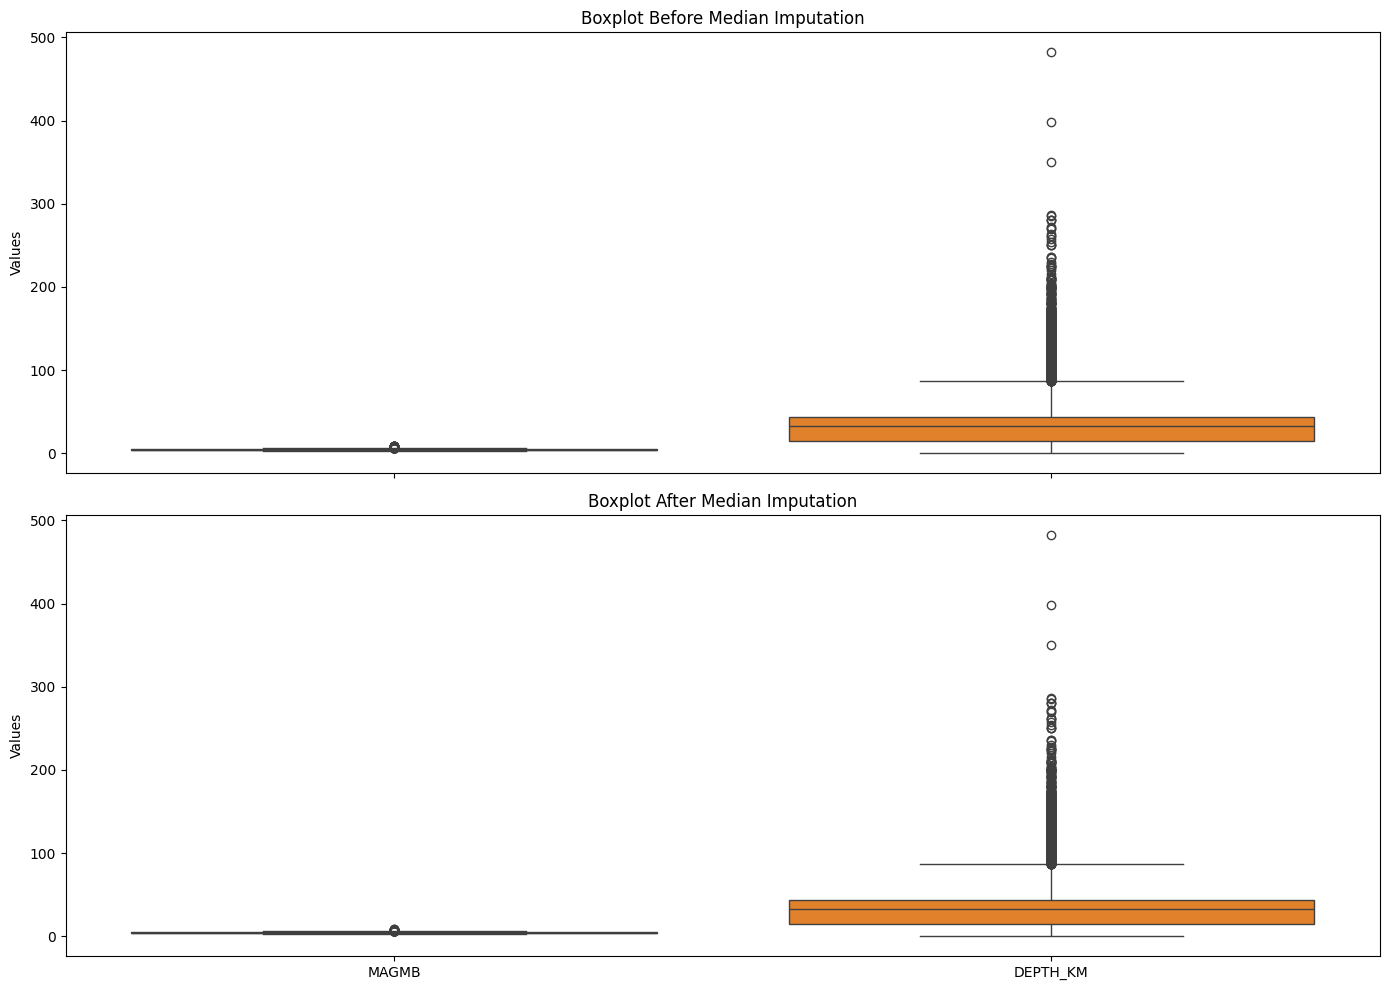

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define potential NA columns for both datasets
global_na_cols = ['nst', 'dmin', 'horizontalError', 'depthError', 'magError', 'magNst']
india_fallback_cols = ['MAGMB', 'DEPTH_KM']

# Check which ones are actually present in df_india
columns_with_na = [col for col in global_na_cols if col in df_india.columns]

# Fallback: use MAGMB and DEPTH_KM if global_na_cols are missing
if not columns_with_na:
    columns_with_na = [col for col in india_fallback_cols if col in df_india.columns]

# Proceed only if we have some numeric columns
if columns_with_na:
    # Extract and copy the relevant columns
    df_before = df_india[columns_with_na].copy()
    df_after = df_before.copy()

    # Impute missing values with median
    for col in columns_with_na:
        median_val = df_after[col].median()
        df_after[col] = df_after[col].fillna(median_val)

    # Plot before and after boxplots
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

    # Before Imputation
    sns.boxplot(data=df_before, ax=axes[0])
    axes[0].set_title("Boxplot Before Median Imputation")
    axes[0].set_ylabel("Values")

    # After Imputation
    sns.boxplot(data=df_after, ax=axes[1])
    axes[1].set_title("Boxplot After Median Imputation")
    axes[1].set_ylabel("Values")

    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No suitable numeric columns found for imputation or boxplotting.")

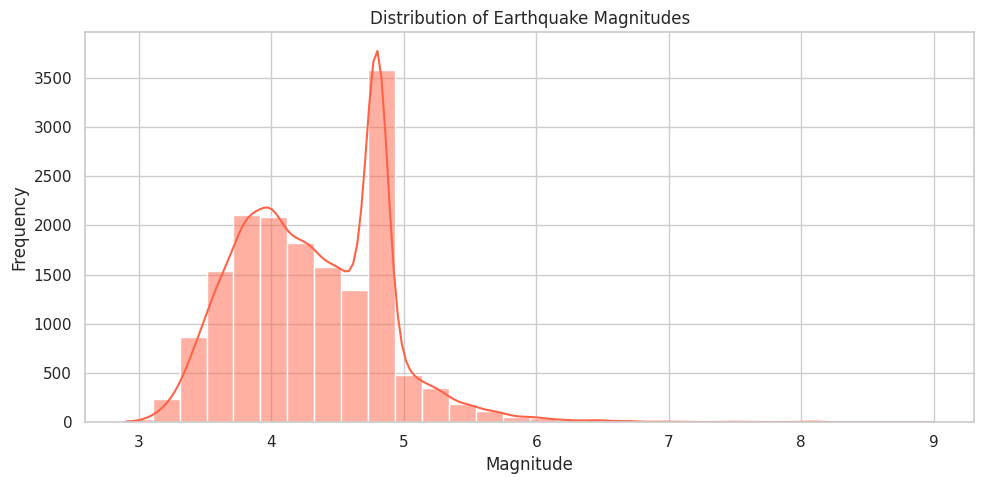

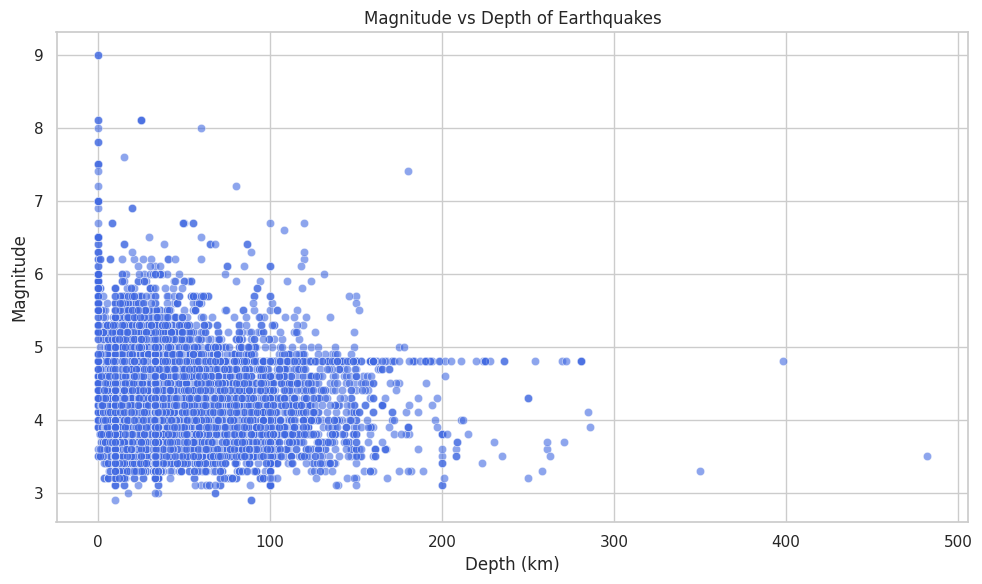

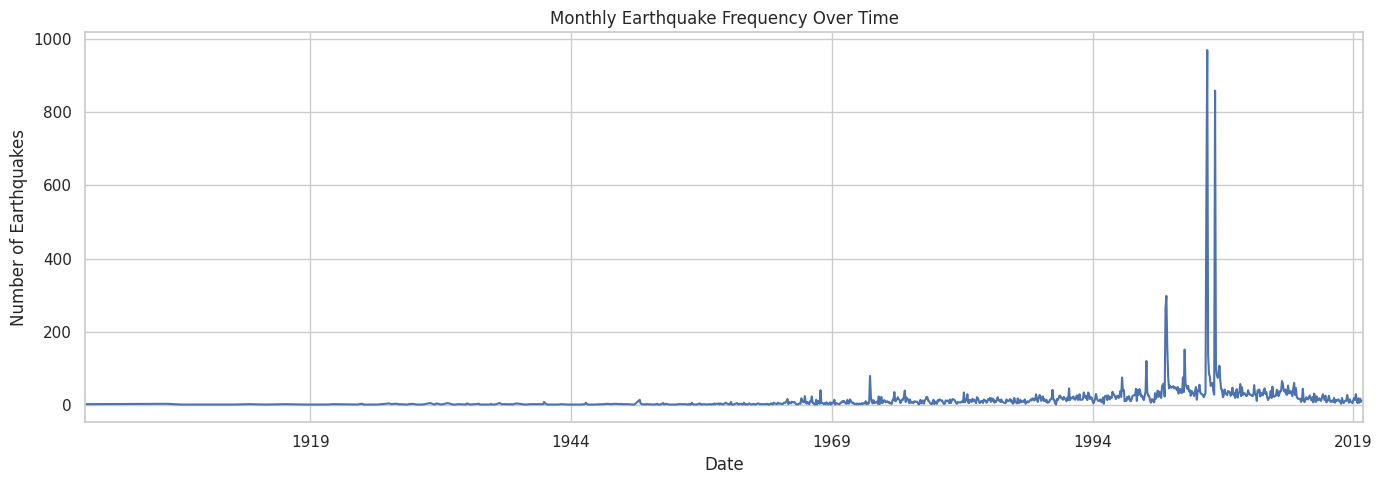

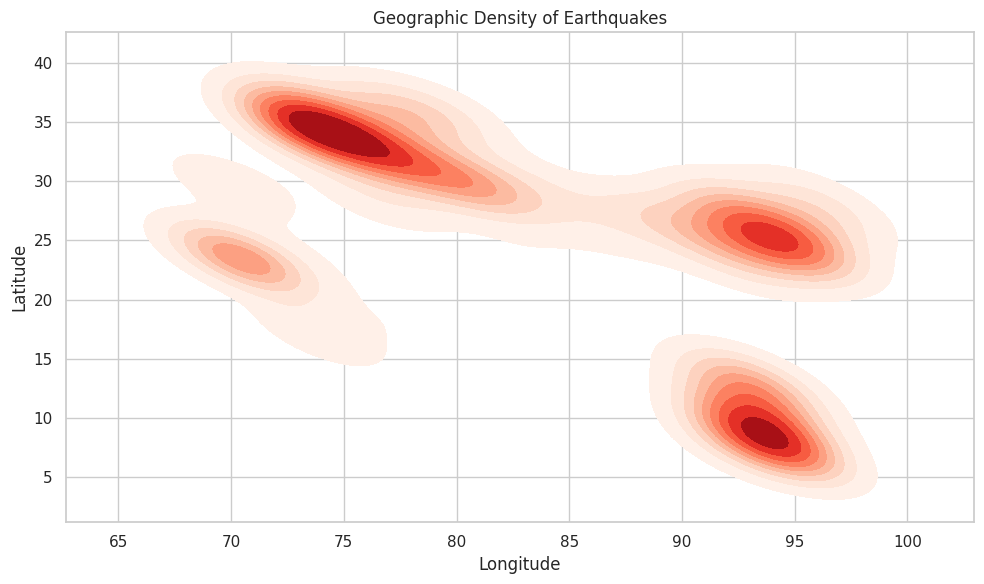

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# 🌐 Define fallback mappings for key columns
col_map = {
    'mag': 'mag' if 'mag' in df_india.columns else 'MAGMB',
    'depth': 'depth' if 'depth' in df_india.columns else 'DEPTH_KM',
    'latitude': 'latitude' if 'latitude' in df_india.columns else 'LAT',
    'longitude': 'longitude' if 'longitude' in df_india.columns else 'LONG_',
    'place': 'place' if 'place' in df_india.columns else None
}

# 1. 📊 Distribution of Earthquake Magnitudes
if col_map['mag'] in df_india.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_india[col_map['mag']], bins=30, kde=True, color='tomato')
    plt.title('Distribution of Earthquake Magnitudes')
    plt.xlabel('Magnitude')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# 2. 🏙️ Top 10 Locations with Most Earthquakes (only if 'place' exists)
if col_map['place']:
    top_places = df_india[col_map['place']].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=top_places.values,
        y=top_places.index,
        hue=top_places.index,
        palette='viridis',
        dodge=False,
        legend=False
    )
    plt.title('Top 10 Locations with Most Earthquakes')
    plt.xlabel('Number of Earthquakes')
    plt.ylabel('Place')
    plt.tight_layout()
    plt.show()

# 3. 🎯 Magnitude vs Depth Scatter Plot
if col_map['mag'] in df_india.columns and col_map['depth'] in df_india.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        data=df_india,
        x=col_map['depth'],
        y=col_map['mag'],
        alpha=0.6,
        color='royalblue'
    )
    plt.title('Magnitude vs Depth of Earthquakes')
    plt.xlabel('Depth (km)')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()

# 4. 🕒 Earthquakes Over Time (Monthly)
if 'time' in df_india.columns:
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)
    df_india['year_month'] = df_india['time'].dt.to_period('M')
    monthly_counts = df_india.groupby('year_month').size()

    plt.figure(figsize=(14, 5))
    monthly_counts.plot()
    plt.title('Monthly Earthquake Frequency Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Earthquakes')
    plt.tight_layout()
    plt.show()

# 5. 🌍 Earthquake Location Heatmap
if col_map['latitude'] in df_india.columns and col_map['longitude'] in df_india.columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(
        x=df_india[col_map['longitude']],
        y=df_india[col_map['latitude']],
        cmap="Reds",
        fill=True,
        thresh=0.05
    )
    plt.title('Geographic Density of Earthquakes')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.show()

✅ Risk level classified using 'MW' column.


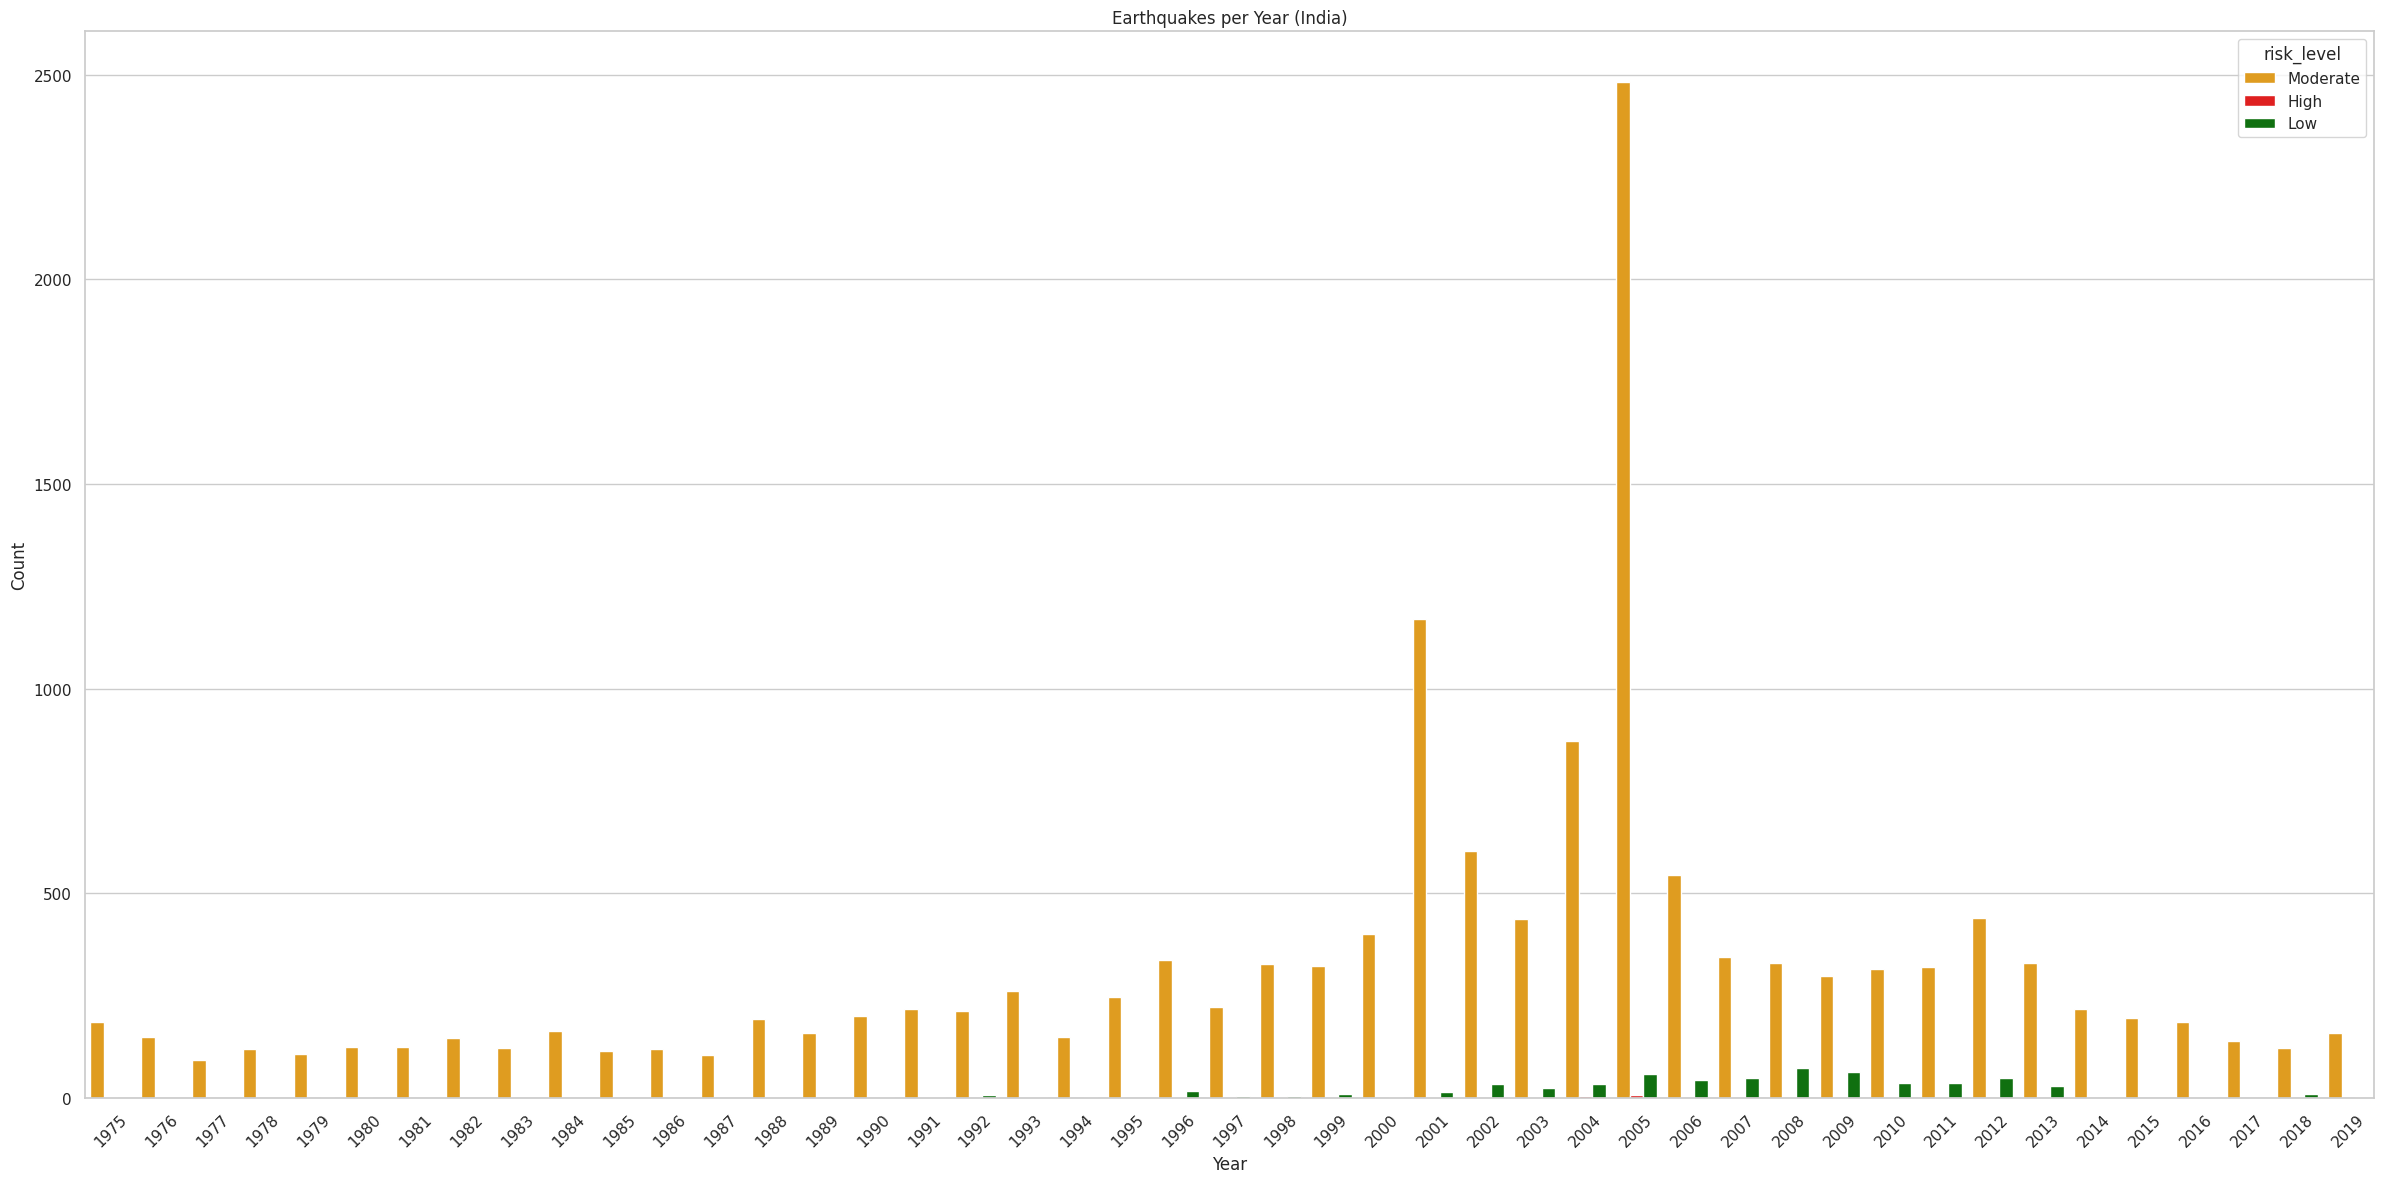

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'time' column is parsed
if 'time' in df_india.columns:
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)
    df_india['year'] = df_india['time'].dt.year
else:
    print("⚠️ No 'time' column found.")

# Dynamically determine magnitude column for risk classification
mag_col = None
for col in ['mag', 'MW', 'MAGMB']:
    if col in df_india.columns:
        mag_col = col
        break

# Add 'risk_level' if not already added
if mag_col and 'risk_level' not in df_india.columns:
    def classify_risk(mag):
        if mag < 4.0:
            return 'Low'
        elif 4.0 <= mag < 6.0:
            return 'Moderate'
        else:
            return 'High'

    df_india['risk_level'] = df_india[mag_col].apply(classify_risk)
    print(f"✅ Risk level classified using '{mag_col}' column.")

# Plot if both 'year' and 'risk_level' are present
if 'year' in df_india.columns and 'risk_level' in df_india.columns:
    df_filtered = df_india[df_india['year'] >= 1975]
    plt.figure(figsize=(24, 12))
    palette = {
    'Low': 'Green',
    'Moderate': 'Orange',
    'High': 'Red'
    }
    sns.countplot(x='year', hue='risk_level', data=df_filtered, palette=palette)
    plt.title('Earthquakes per Year (India)')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Required columns 'year' or 'risk_level' not found for plotting.")

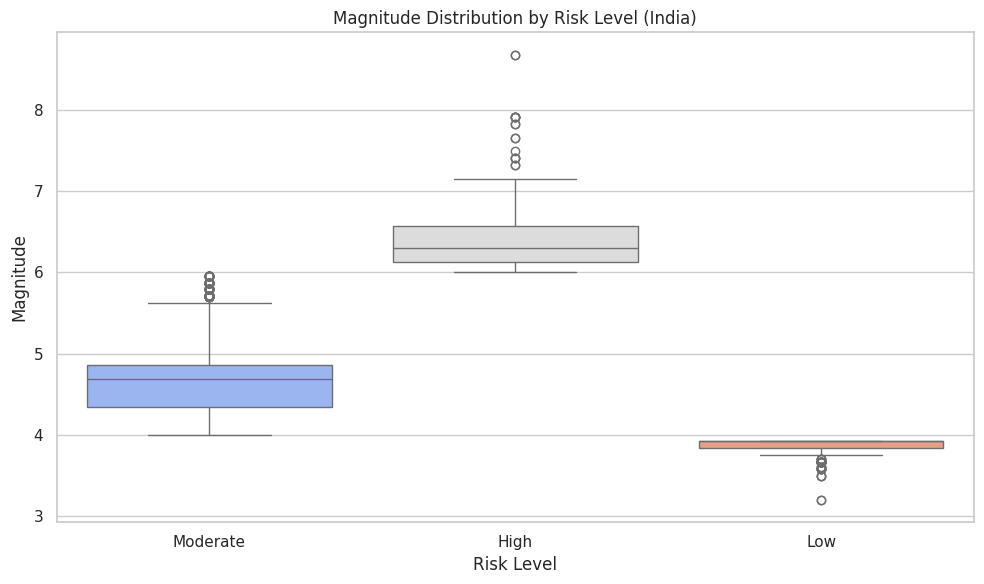

In [14]:
#Magnitude Distribution by Risk Level
# 🔍 Determine magnitude column again if needed
if not mag_col:
    for col in ['mag', 'MW', 'MAGMB']:
        if col in df_india.columns:
            mag_col = col
            break

# ✅ Only plot if required columns exist
if 'risk_level' in df_india.columns and mag_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='risk_level',
        y=mag_col,
        hue='risk_level',
        data=df_india,
        palette='coolwarm',
        legend=False
    )
    plt.title('Magnitude Distribution by Risk Level (India)')
    plt.xlabel('Risk Level')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Cannot plot boxplot — 'risk_level' or valid magnitude column is missing.")


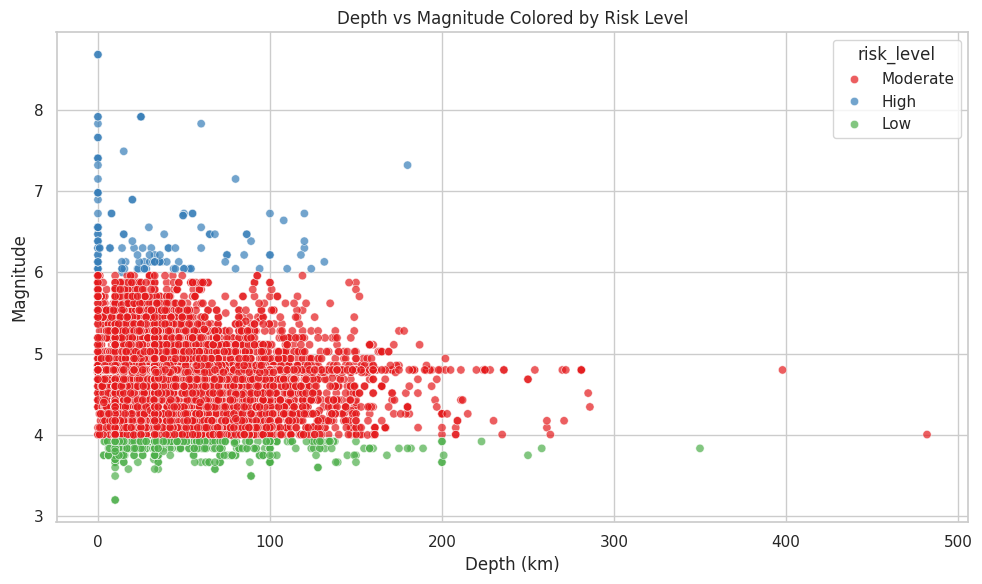

In [15]:
# 🔁 Dynamically re-identify depth and magnitude columns
depth_col = None
for col in ['depth', 'DEPTH_KM']:
    if col in df_india.columns:
        depth_col = col
        break

if not mag_col:
    for col in ['mag', 'MW', 'MAGMB']:
        if col in df_india.columns:
            mag_col = col
            break

# ✅ Plot if all required columns are present
if depth_col and mag_col and 'risk_level' in df_india.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=depth_col,
        y=mag_col,
        hue='risk_level',
        data=df_india,
        palette='Set1',
        alpha=0.7
    )
    plt.title('Depth vs Magnitude Colored by Risk Level')
    plt.xlabel('Depth (km)')
    plt.ylabel('Magnitude')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Cannot plot scatter: Required columns missing — check depth, magnitude, or risk_level.")

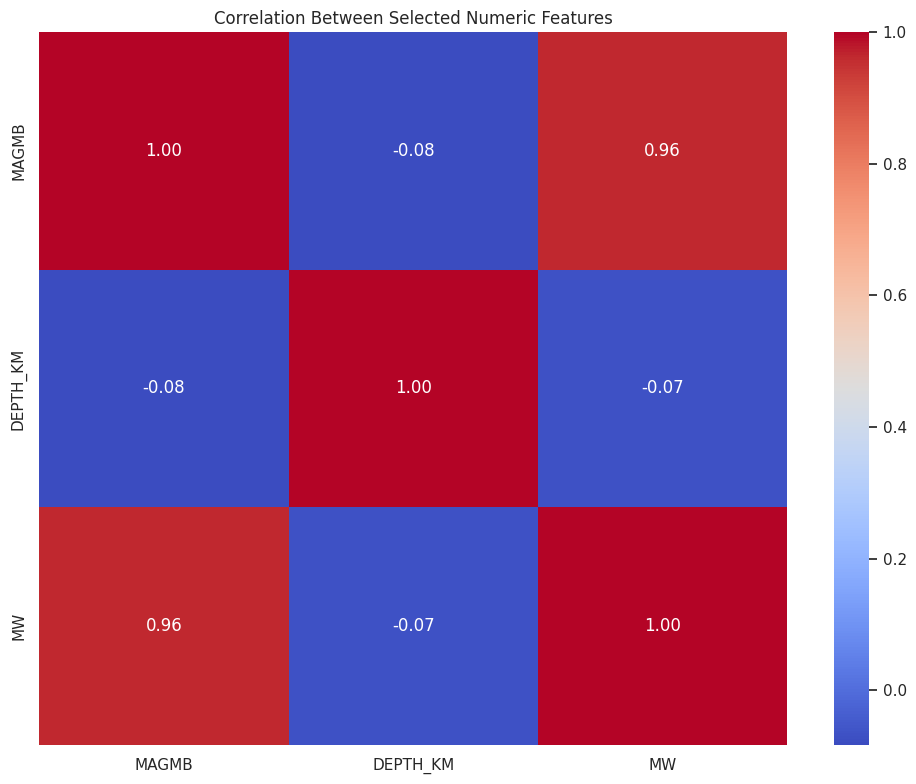

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define possible global NA columns and India fallback numeric columns
possible_corr_cols = ['nst', 'dmin', 'horizontalError', 'depthError', 'magError', 'magNst']
india_numeric_cols = ['MAGMB', 'DEPTH_KM', 'MW']

# Dynamically find available numeric columns
columns_with_na = [col for col in possible_corr_cols if col in df_india.columns]

# Fallback to India-specific numeric columns if none found
if not columns_with_na:
    columns_with_na = [col for col in india_numeric_cols if col in df_india.columns]

# ✅ Plot heatmap only if at least 2 numeric columns exist
if len(columns_with_na) >= 2:
    plt.figure(figsize=(10, 8))
    corr = df_india[columns_with_na].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Between Selected Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Not enough numeric columns found for correlation heatmap.")

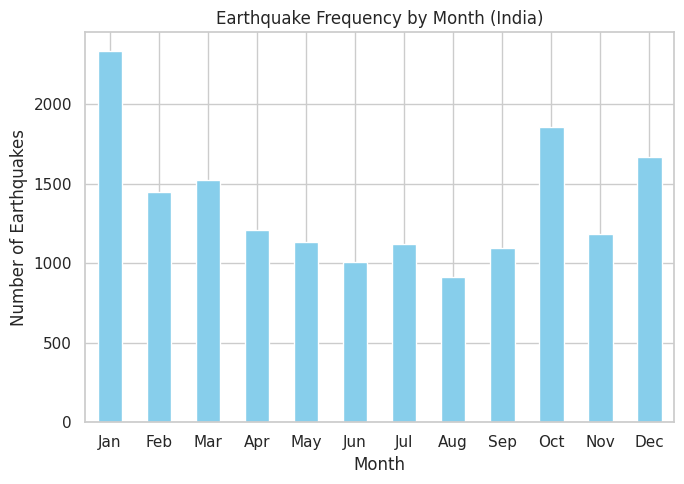

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Ensure 'time' column is datetime
if 'time' in df_india.columns:
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)

    # ✅ Create 'month' column if not already present
    if 'month' not in df_india.columns:
        df_india['month'] = df_india['time'].dt.month

    # ✅ Group and count earthquakes per month
    monthly_counts = df_india.groupby('month').size().reindex(range(1, 13), fill_value=0)

    # ✅ Plotting
    plt.figure(figsize=(7, 5))
    monthly_counts.plot(kind='bar', color='skyblue')
    plt.title('Earthquake Frequency by Month (India)')
    plt.xlabel('Month')
    plt.ylabel('Number of Earthquakes')
    plt.xticks(
        ticks=range(12),
        labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        rotation=0
    )
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ 'time' column missing. Cannot extract or group by month.")

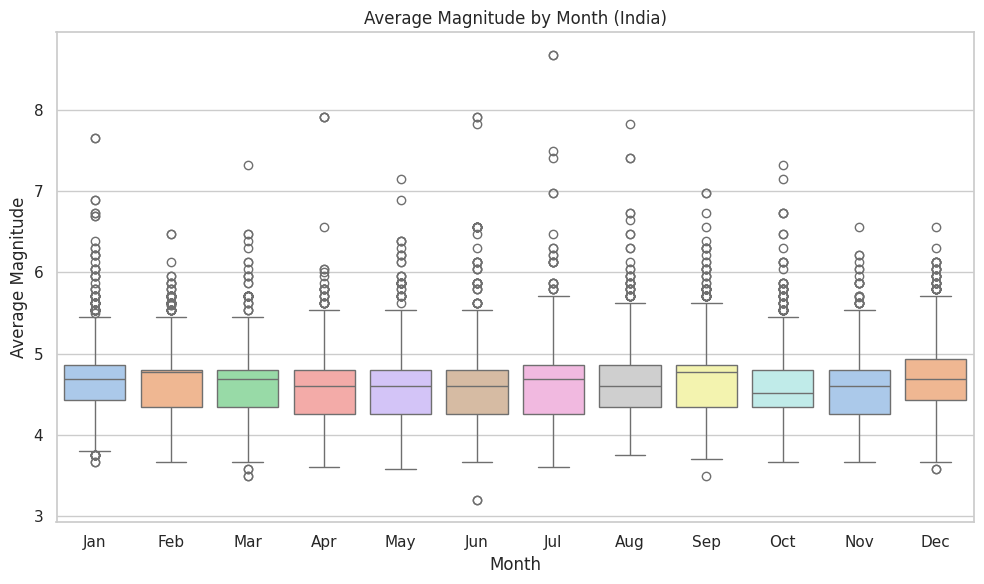

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔁 Find appropriate magnitude column
mag_col = None
for col in ['mag', 'MW', 'MAGMB']:
    if col in df_india.columns:
        mag_col = col
        break

# ✅ Ensure 'time' is datetime and extract 'month'
if 'time' in df_india.columns:
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)
    if 'month' not in df_india.columns:
        df_india['month'] = df_india['time'].dt.month
else:
    print("⚠️ 'time' column is missing or invalid.")

# ✅ Plot if valid magnitude column and month are available
if mag_col and 'month' in df_india.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='month',
        y=mag_col,
        data=df_india,
        palette='pastel'
    )
    plt.title('Average Magnitude by Month (India)')
    plt.xlabel('Month')
    plt.ylabel('Average Magnitude')
    plt.xticks(
        ticks=range(12),
        labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        rotation=0
    )
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Cannot plot — missing either 'month' or a valid magnitude column.")

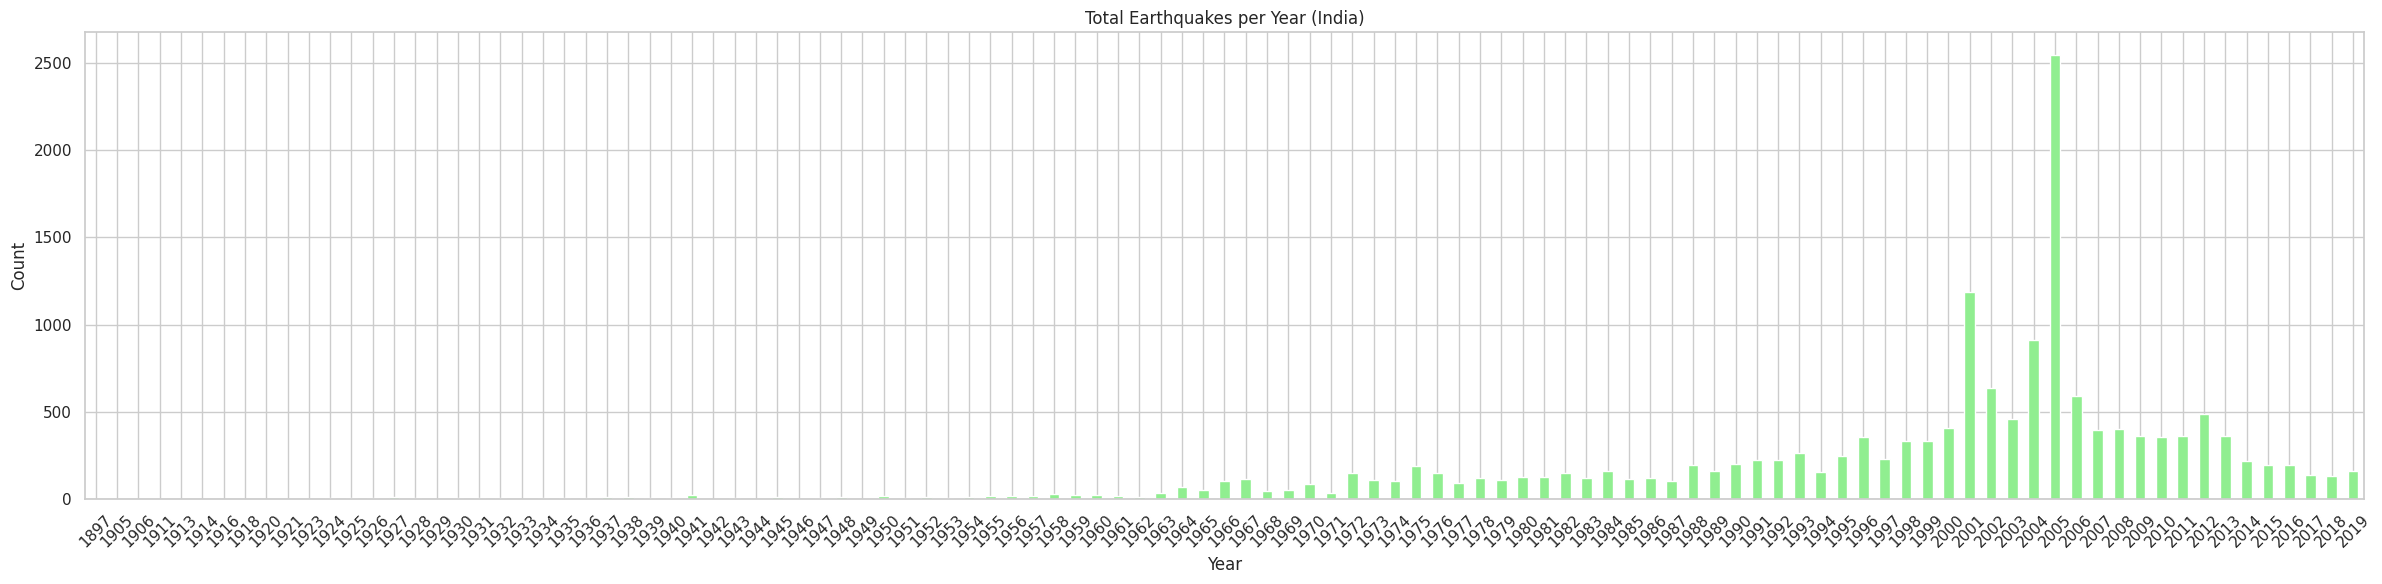

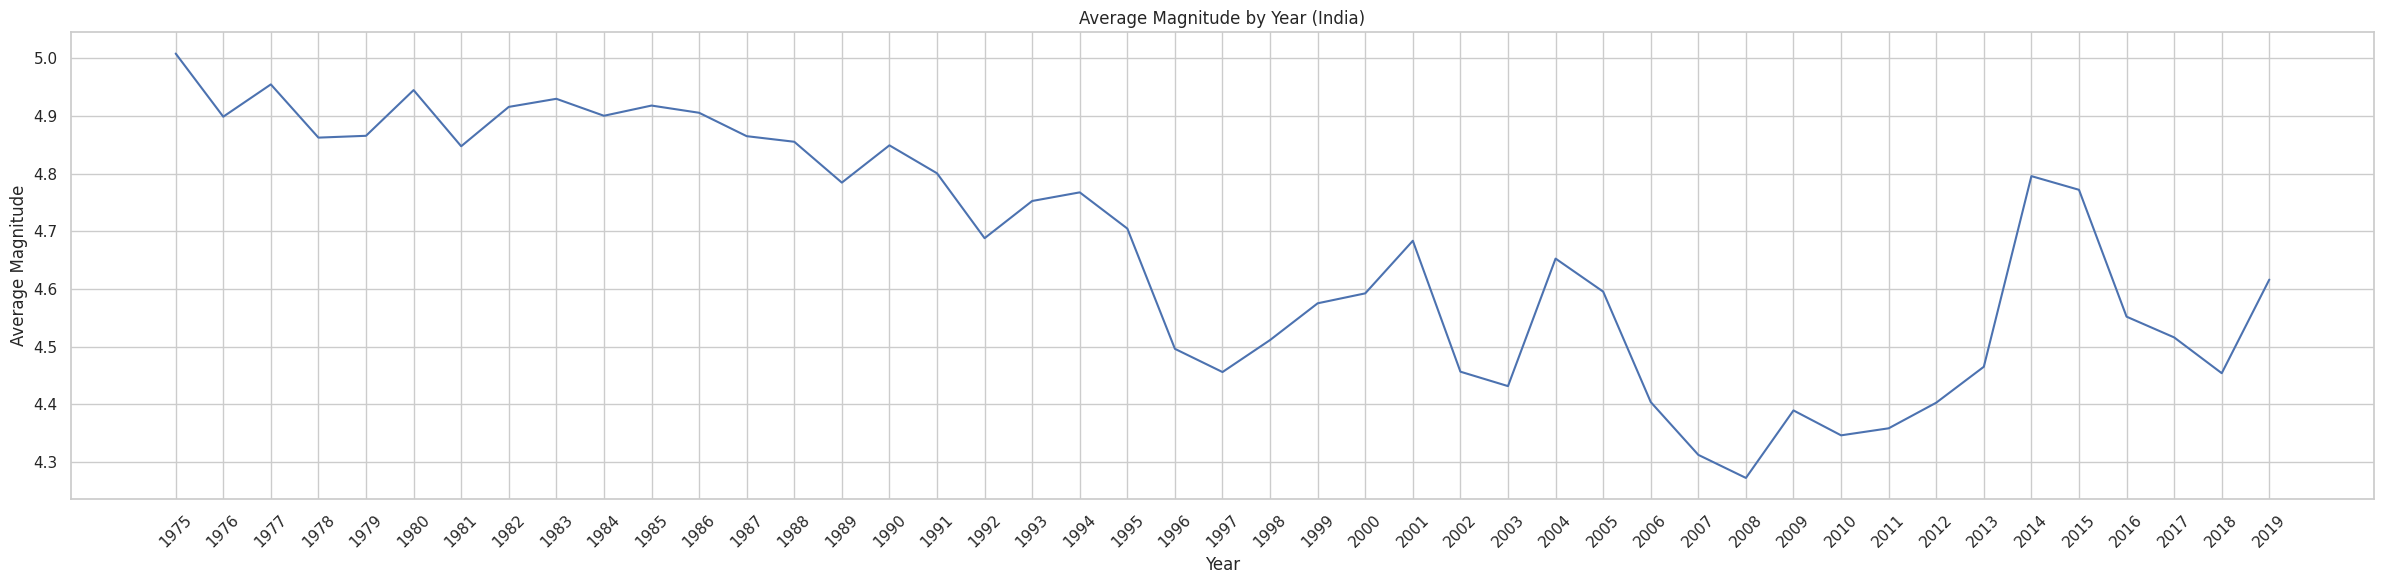

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔁 Detect magnitude column
mag_col = None
for col in ['mag', 'MW', 'MAGMB']:
    if col in df_india.columns:
        mag_col = col
        break

# ✅ Ensure 'time' and 'year' columns exist
if 'time' in df_india.columns:
    df_india['time'] = pd.to_datetime(df_india['time'], errors='coerce')
    df_india.dropna(subset=['time'], inplace=True)
    if 'year' not in df_india.columns:
        df_india['year'] = df_india['time'].dt.year
else:
    print("⚠️ 'time' column is missing. Cannot extract 'year'.")

# ✅ Plot 1: Total Earthquakes per Year
if 'year' in df_india.columns:
    yearly_counts = df_india.groupby('year').size()

    plt.figure(figsize=(24, 6))
    yearly_counts.plot(kind='bar', color='lightgreen')
    plt.title('Total Earthquakes per Year (India)')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'year' column is missing. Cannot plot total earthquakes per year.")

# ✅ Plot 2: Average Magnitude by Year
if 'year' in df_india.columns and mag_col:
    df_filtered = df_india[df_india['year'] >= 1975]
    avg_mag_by_year = df_filtered.groupby('year')[mag_col].mean().reset_index()

    plt.figure(figsize=(24, 6))
    sns.lineplot(x='year', y=mag_col, data=avg_mag_by_year)
    plt.title('Average Magnitude by Year (India)')
    plt.xlabel('Year')
    plt.ylabel('Average Magnitude')
    plt.xticks(avg_mag_by_year['year'], rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Cannot plot average magnitude — missing either 'year' or valid magnitude column.")

In [21]:
# Ensure 'year' column is present and numeric
df_india['year'] = pd.to_datetime(df_india['time']).dt.year

# Filter for years >= 1950
df_since_1950 = df_india[df_india['year'] >= 1950]

# Group by year and count earthquakes
quakes_per_year = df_since_1950.groupby('year').size()

# Calculate the average
average_earthquakes = quakes_per_year.mean()
print(f"🔢 Average earthquakes per year since 1950: {average_earthquakes:.2f}")

🔢 Average earthquakes per year since 1950: 232.91


✅ Descriptive Statistics for Selected Columns:
           DEPTH_KM            MW         MAGMB        HubDist  FaultDensity
count  16494.000000  16494.000000  16494.000000   16494.000000   2422.000000
mean      37.737401      4.640754      4.321838  106881.384731      4.285350
std       33.131730      0.443555      0.557117   89227.313196      3.949411
min        0.000000      3.200000      2.900000     368.678227      0.000004
25%       15.000000      4.345000      3.900000   42717.407100      0.850582
50%       33.000000      4.685000      4.300000   82103.783475      2.614245
75%       43.790000      4.800000      4.800000  144111.611575      7.966164
max      482.000000      8.680000      9.000000  551179.926000     13.100919
----------------------------------------
✅ Missing Values Count:
DEPTH_KM            0
MW                  0
MAGMB               0
HubDist             0
FaultDensity    14072
dtype: int64
----------------------------------------
✅ Distribution Plots:


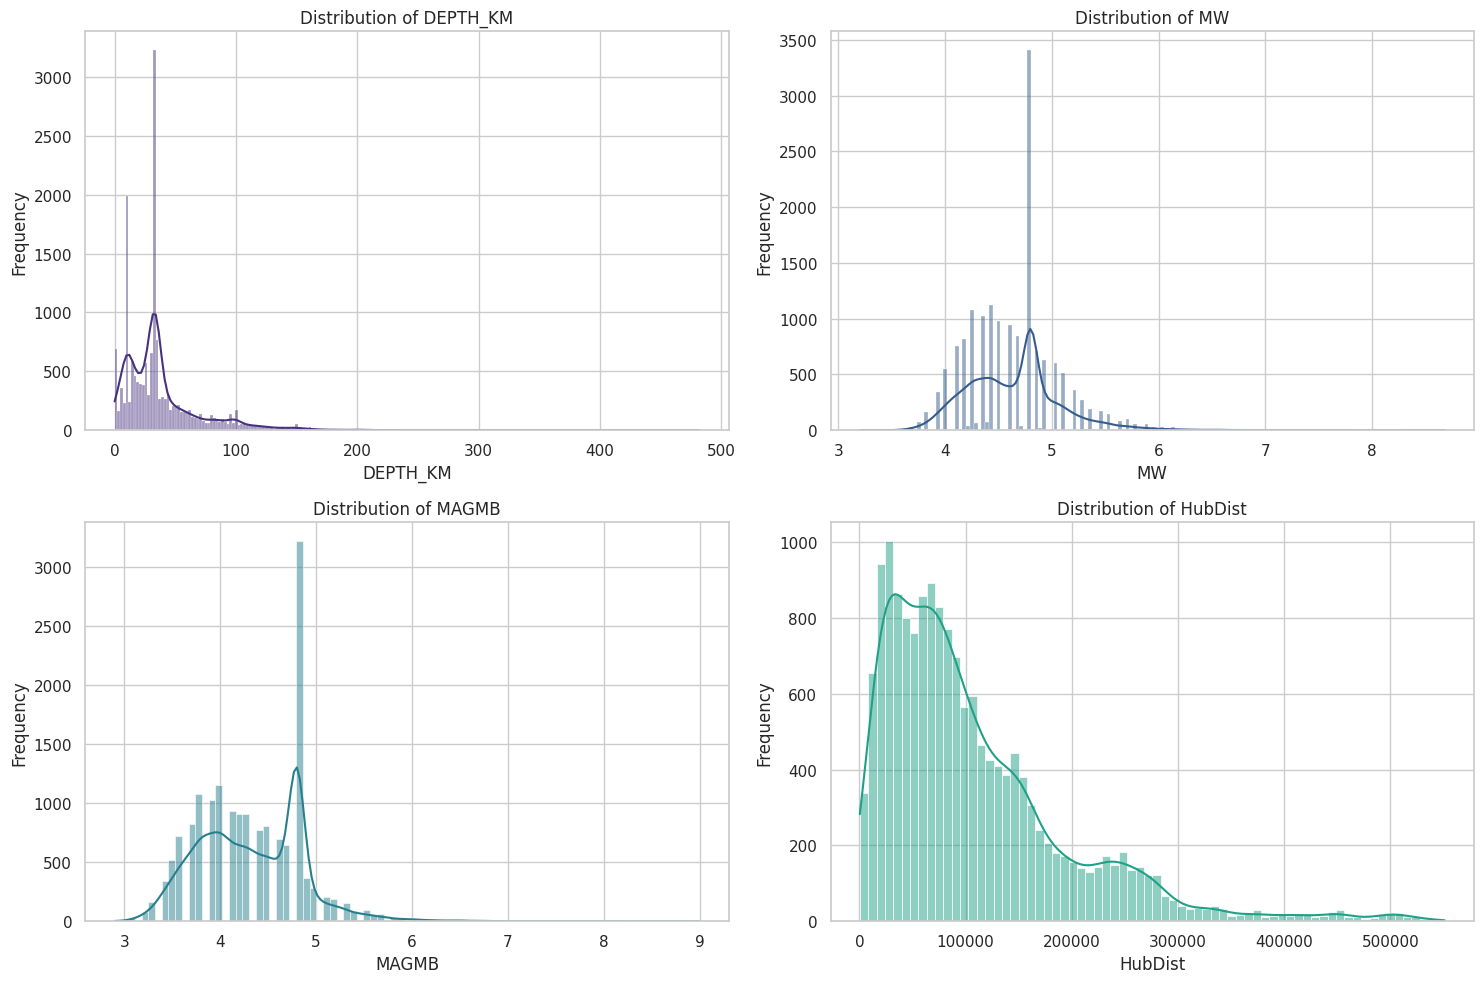

----------------------------------------
✅ Boxplots:


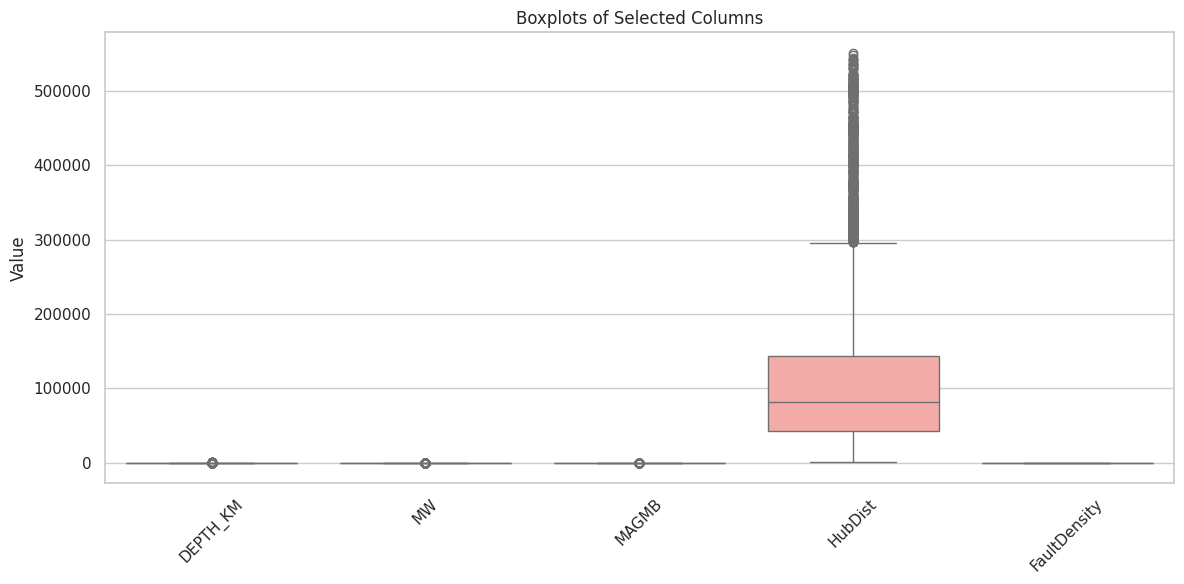

----------------------------------------
✅ Correlation Matrix:


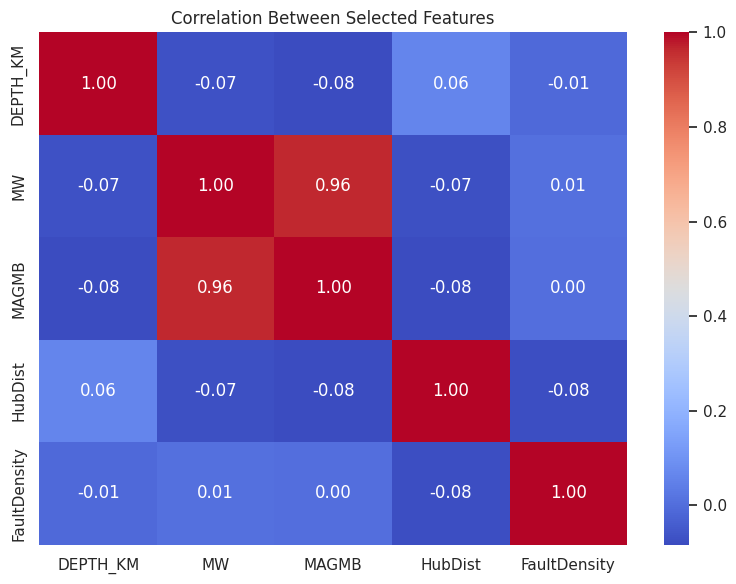

----------------------------------------
✅ Scatter Plots Against Magnitude:


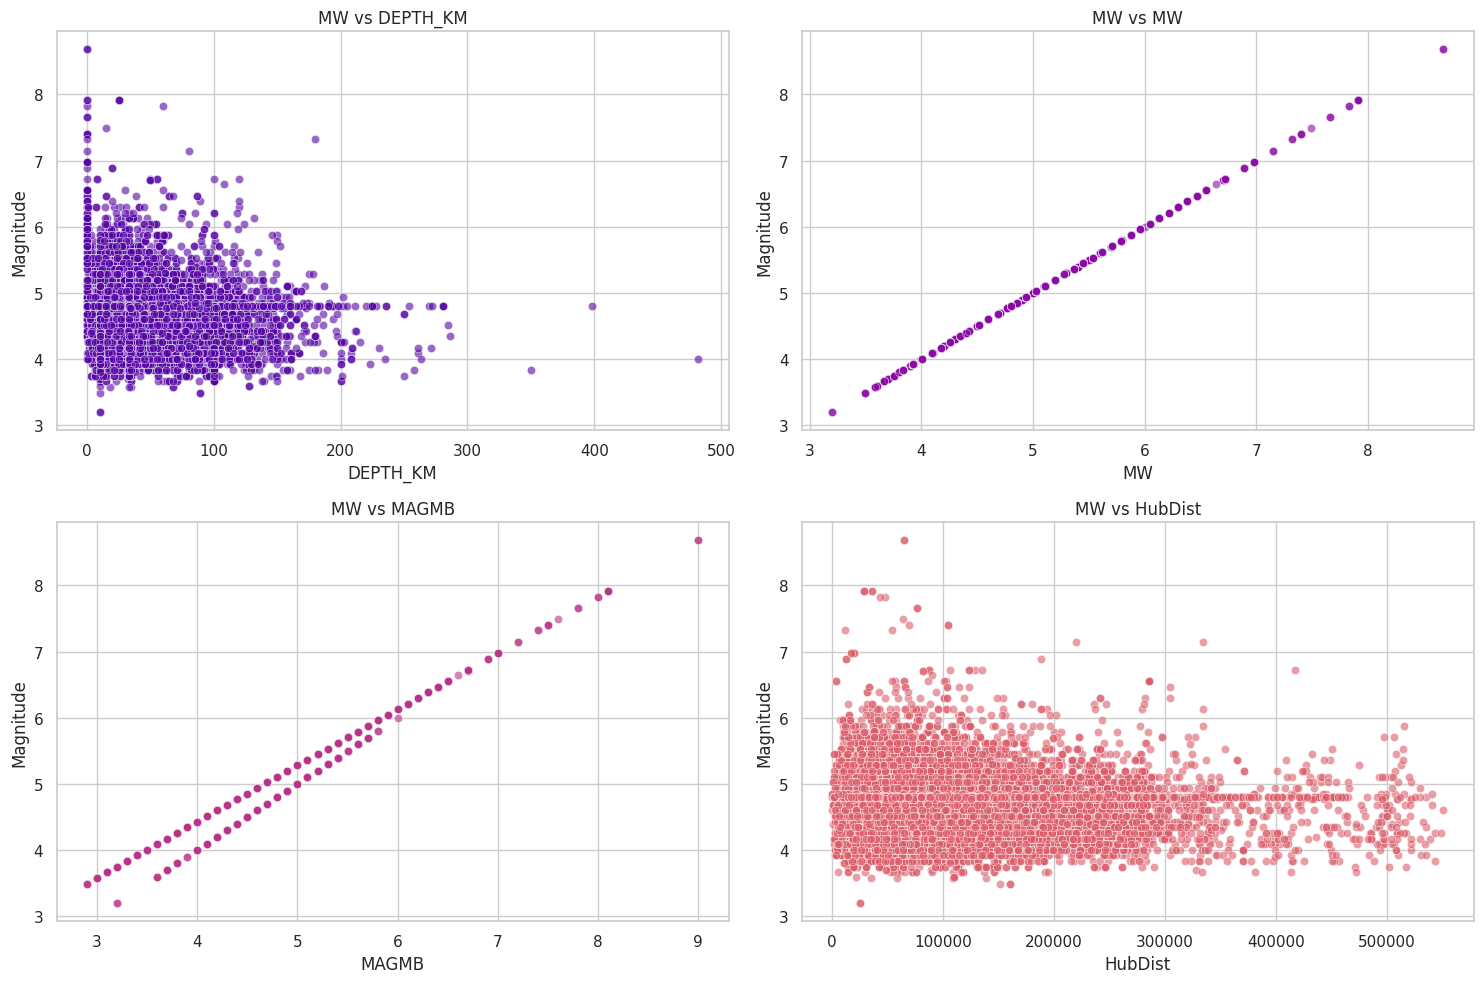

----------------------------------------
✅ Violin Plots by Risk Level:


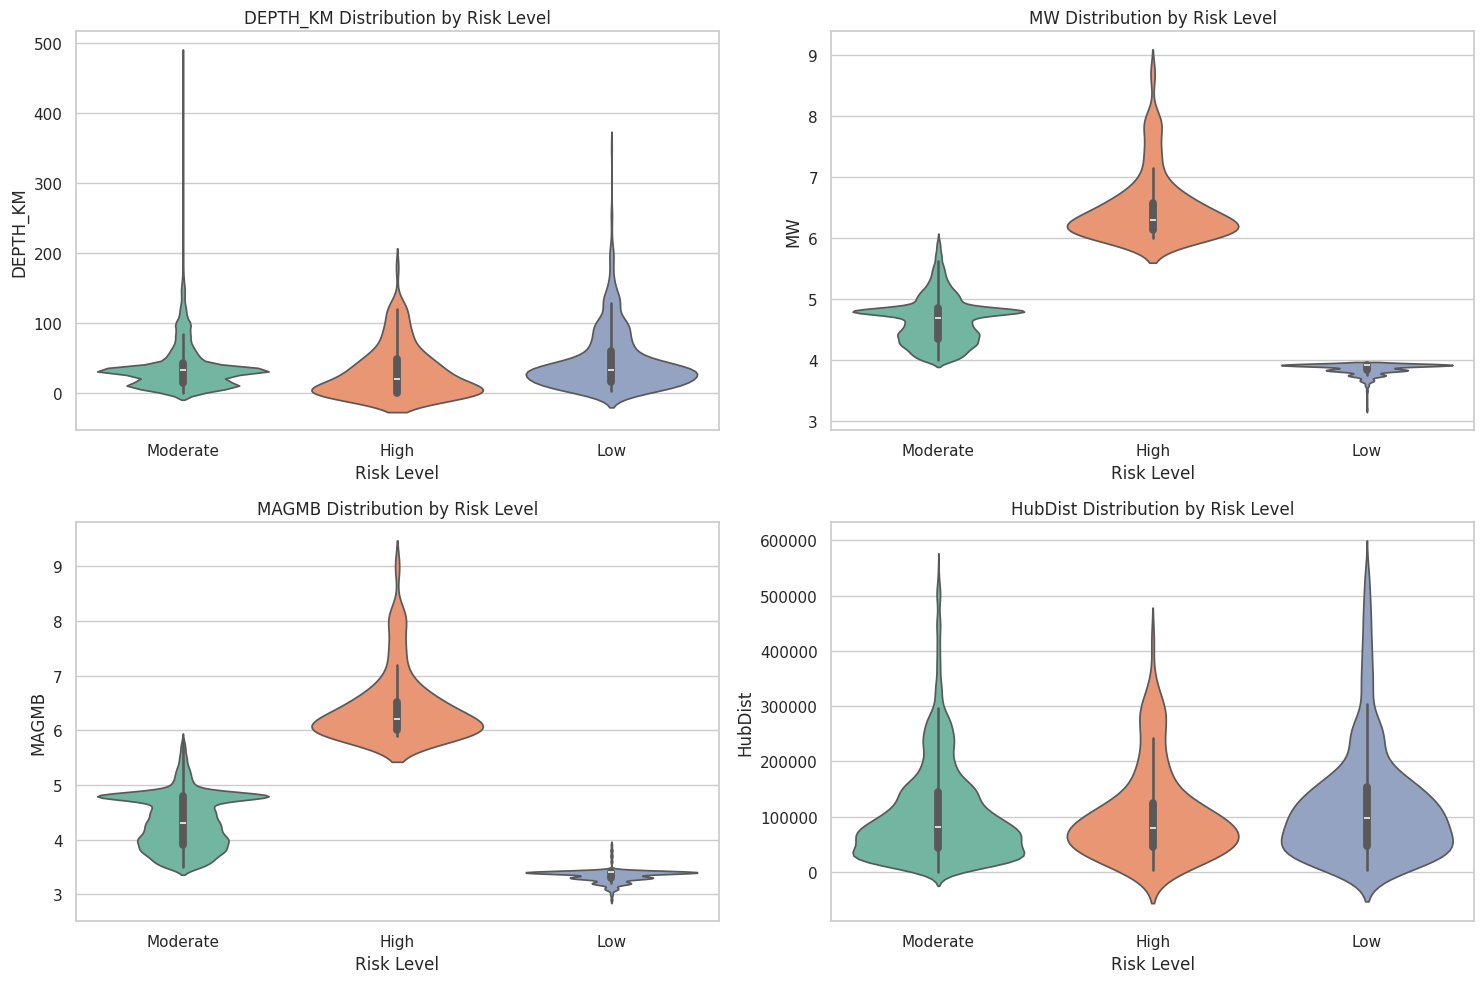

----------------------------------------


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 🔁 Set style
sns.set(style="whitegrid")

# ✅ Define fallback columns
magnitude_cols = ['mag', 'MW', 'MAGMB']
global_analysis_cols = ['nst', 'gap', 'dmin', 'rms']
india_analysis_cols = ['DEPTH_KM', 'MW', 'MAGMB', 'HubDist', 'FaultDensity']

# ✅ Detect available magnitude column
mag_col = next((col for col in magnitude_cols if col in df_india.columns), None)

# ✅ Detect available analysis columns based on dataset
analysis_cols = [col for col in global_analysis_cols + india_analysis_cols if col in df_india.columns]

# ✅ Create 'risk_level' if not already present
if mag_col and 'risk_level' not in df_india.columns:
    def classify_risk(mag):
        if mag < 4.0:
            return 'Low'
        elif 4.0 <= mag < 6.0:
            return 'Moderate'
        else:
            return 'High'
    df_india['risk_level'] = df_india[mag_col].apply(classify_risk)

# ✅ Proceed only if we have at least 1 numeric analysis column
if analysis_cols:
    print("✅ Descriptive Statistics for Selected Columns:")
    print(df_india[analysis_cols].describe())
    print("-" * 40)

    print("✅ Missing Values Count:")
    print(df_india[analysis_cols].isnull().sum())
    print("-" * 40)

    # 📊 Distribution Plots
    print("✅ Distribution Plots:")
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(analysis_cols[:4]):
        plt.subplot(2, 2, i + 1)
        sns.histplot(df_india[col], kde=True, color=sns.color_palette('viridis')[i])
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    print("-" * 40)

    # 📦 Boxplots
    print("✅ Boxplots:")
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_india[analysis_cols], palette='pastel')
    plt.title('Boxplots of Selected Columns')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("-" * 40)

    # 🔗 Correlation Matrix
    print("✅ Correlation Matrix:")
    plt.figure(figsize=(8, 6))
    corr = df_india[analysis_cols].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Between Selected Features')
    plt.tight_layout()
    plt.show()
    print("-" * 40)

    # 🔁 Scatter Plots with Magnitude
    if mag_col:
        print("✅ Scatter Plots Against Magnitude:")
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(analysis_cols[:4]):
            plt.subplot(2, 2, i + 1)
            sns.scatterplot(data=df_india, x=col, y=mag_col, alpha=0.6, color=sns.color_palette('plasma')[i])
            plt.title(f'{mag_col} vs {col}')
            plt.xlabel(col)
            plt.ylabel('Magnitude')
        plt.tight_layout()
        plt.show()
        print("-" * 40)
    else:
        print("⚠️ Magnitude column not found — skipping scatter plots.")

    # 🎻 Violin Plots by Risk Level
    if 'risk_level' in df_india.columns:
        print("✅ Violin Plots by Risk Level:")
        plt.figure(figsize=(15, 10))
        for i, col in enumerate(analysis_cols[:4]):
            plt.subplot(2, 2, i + 1)
            sns.violinplot(x='risk_level', y=col, data=df_india,
                           palette='Set2', hue='risk_level', legend=False)
            plt.title(f'{col} Distribution by Risk Level')
            plt.xlabel('Risk Level')
            plt.ylabel(col)
        plt.tight_layout()
        plt.show()
        print("-" * 40)
    else:
        print("⚠️ 'risk_level' not available — skipping violin plots.")

else:
    print("⚠️ No valid numeric analysis columns found in the dataset.")

In [23]:
# 🔁 All candidate columns (global + India-specific)
all_possible_cols = ['nst', 'gap', 'dmin', 'rms', 'DEPTH_KM', 'MW', 'MAGMB', 'HubDist', 'FaultDensity']

# ✅ Filter columns that exist in the dataset
columns_to_impute = [col for col in all_possible_cols if col in df_india.columns]

# ✅ Impute missing values using mean
for col in columns_to_impute:
    mean_val = df_india[col].mean()
    df_india[col] = df_india[col].fillna(mean_val)

# ✅ Show verification of imputation
print("✅ Missing values after mean imputation:")
print(df_india[columns_to_impute].isnull().sum())

✅ Missing values after mean imputation:
DEPTH_KM        0
MW              0
MAGMB           0
HubDist         0
FaultDensity    0
dtype: int64


In [24]:
df_india.isnull().sum()

,0
X,0
Y,0
OBJECTID,0
SOURCE,3
YR,0
MO,0
DT,0
HR,0
MN,0
SEC,0


In [25]:
# Define possible NA-prone columns (global + India-specific)
global_na_cols = ['horizontalError', 'depthError', 'magError', 'magNst']
india_na_cols = ['HubDist', 'FaultDensity', 'MW', 'MAGMB']

# Combine and filter only columns that exist in the DataFrame
columns_to_handle_na = [col for col in (global_na_cols + india_na_cols) if col in df_india.columns]

# Impute missing values using median for each valid column
for col in columns_to_handle_na:
    if df_india[col].isnull().any():
        median_val = df_india[col].median()
        df_india[col] = df_india[col].fillna(median_val)
        print(f"✅ Imputed missing values in '{col}' with median: {median_val:.3f}")
    else:
        print(f"✔️ No missing values in '{col}'")

# Summary of missing values
print("\n✅ Missing values after imputation in key columns:")
print(df_india[columns_to_handle_na].isnull().sum())

print("\n🔍 Total missing values per column (entire DataFrame):")
print(df_india.isnull().sum()[df_india.isnull().sum() > 0])  # Only show columns with NA

✔️ No missing values in 'HubDist'
✔️ No missing values in 'FaultDensity'
✔️ No missing values in 'MW'
✔️ No missing values in 'MAGMB'

✅ Missing values after imputation in key columns:
HubDist         0
FaultDensity    0
MW              0
MAGMB           0
dtype: int64

🔍 Total missing values per column (entire DataFrame):
SOURCE        3
HubName    6783
dtype: int64


In [26]:
df_india.head(4)

,X,Y,OBJECTID,SOURCE,YR,MO,DT,HR,MN,SEC,...,DEPTH_KM,MW,HubName,HubDist,FaultDensity,time,year_month,year,risk_level,month
0,885385.2550,3047879.287,10403,ISC,1991,11,20,12,11,3,...,69.0,4.80,NaN,104658.11830,4.28535,1991-11-20 12:11:03,1991-11,1991,Moderate,11
1,867510.1211,3036551.478,38917,NEIC,2015,5,27,7,30,58,...,10.0,4.77,NaN,87938.60714,4.28535,2015-05-27 07:30:58,2015-05,2015,Moderate,5
2,862566.0542,3027824.935,38916,NEIC,2015,5,27,7,30,41,...,10.0,4.43,NaN,78239.09747,4.28535,2015-05-27 07:30:41,2015-05,2015,Moderate,5
3,826054.0393,3046155.615,19677,ISC,2000,6,8,0,18,4,...,33.0,4.60,NaN,95748.16790,4.28535,2000-06-08 00:18:04,2000-06,2000,Moderate,6


In [27]:
df_india['time_numeric'] = df_india['time'].astype('int64') // 10**9

In [28]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

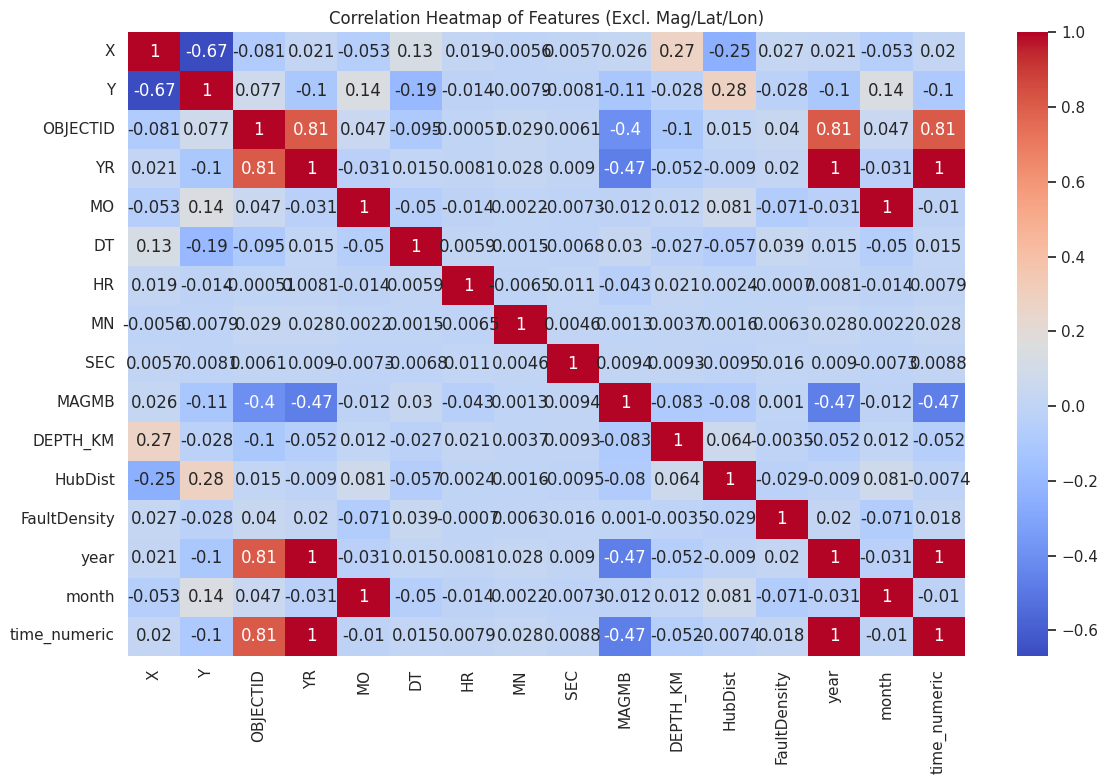


✅ Variance Inflation Factor (VIF) Table:
         feature        VIF
3             YR        inf
4             MO        inf
13          year        inf
14         month        inf
15  time_numeric  17.729471
2       OBJECTID   3.291825
1              Y   2.177541
0              X   2.104519
9          MAGMB   1.356937
10      DEPTH_KM   1.176027
11       HubDist   1.117465
5             DT   1.064039
12  FaultDensity   1.011400
6             HR   1.003090
7             MN   1.001606
8            SEC   1.001012

⚠️ Features with high multicollinearity (VIF > 5):
         feature        VIF
3             YR        inf
4             MO        inf
13          year        inf
14         month        inf
15  time_numeric  17.729471


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# ✅ Define common magnitude and location columns
mag_cols = ['mag', 'MW', 'MAGMB']
lat_cols = ['latitude', 'LAT']
lon_cols = ['longitude', 'LONG_']

# ✅ Get actual column names in current dataset
mag_col = next((col for col in mag_cols if col in df_india.columns), None)
lat_col = next((col for col in lat_cols if col in df_india.columns), None)
lon_col = next((col for col in lon_cols if col in df_india.columns), None)

# ✅ Select only numeric columns
numeric_features = df_india.select_dtypes(include=[np.number])

# ✅ Drop target-like or spatial variables if they exist
drop_cols = [col for col in [lat_col, lon_col, mag_col] if col in numeric_features.columns]
numeric_features = numeric_features.drop(columns=drop_cols, errors='ignore')

# ✅ Drop columns with 0 variance or constant values
numeric_features = numeric_features.loc[:, numeric_features.nunique() > 1]

# ✅ Drop rows with NA for VIF safety
numeric_features = numeric_features.dropna()

# 🔍 Check if at least 2 columns remain
if numeric_features.shape[1] < 2:
    print("⚠️ Not enough valid numeric features for multicollinearity check.")
else:
    # === Correlation Heatmap ===
    corr_matrix = numeric_features.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap of Features (Excl. Mag/Lat/Lon)')
    plt.tight_layout()
    plt.show()

    # === VIF Calculation ===
    vif_data = pd.DataFrame()
    vif_data["feature"] = numeric_features.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(numeric_features.shape[1])]

    print("\n✅ Variance Inflation Factor (VIF) Table:")
    print(vif_data.sort_values(by='VIF', ascending=False))

    # Optional action
    high_vif = vif_data[vif_data["VIF"] > 5]
    if not high_vif.empty:
        print("\n⚠️ Features with high multicollinearity (VIF > 5):")
        print(high_vif)
    else:
        print("\n✅ No multicollinearity issues detected (VIF ≤ 5).")

In [30]:
# === Dimensionality Reduction / Regularization Based on VIF ===

# Assume `vif_data` has been computed as shown earlier
# Get features with VIF > 5
high_vif = vif_data[vif_data['VIF'] > 5]['feature'].tolist()

# Print them clearly
if high_vif:
    print("⚠️ High VIF features (multicollinearity suspected):")
    for feature in high_vif:
        print(f" - {feature} (VIF = {vif_data[vif_data['feature'] == feature]['VIF'].values[0]:.2f})")
else:
    print("✅ No high VIF features found (VIF ≤ 5)")

# Optional: Drop high-VIF features from dataset for further modeling
df_reduced = df_india.drop(columns=high_vif, errors='ignore')
print(f"\n✅ New shape after dropping high VIF features: {df_reduced.shape}")


⚠️ High VIF features (multicollinearity suspected):
 - YR (VIF = inf)
 - MO (VIF = inf)
 - year (VIF = inf)
 - month (VIF = inf)
 - time_numeric (VIF = 17.73)

✅ New shape after dropping high VIF features: (16494, 19)


In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import datetime
import pytz
import joblib

# === Step 1: Calculate VIF ===
def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data['feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif_data

numeric_cols = df_india.select_dtypes(include=np.number).columns.tolist()
vif_data = calculate_vif(df_india, numeric_cols)
high_vif = vif_data[vif_data['VIF'] > 5]['feature'].tolist()

# Identify target columns
lat_col = next((col for col in ['latitude', 'LAT'] if col in df_india.columns), None)
lon_col = next((col for col in ['longitude', 'LONG_'] if col in df_india.columns), None)
mag_col = next((col for col in ['mag', 'MAGMB', 'MW'] if col in df_india.columns), None)
target_cols = [col for col in [lat_col, lon_col, mag_col] if col]
print(f"✅ Using target columns: {target_cols}")

# Separate features to reduce vs low-VIF features
features_to_reduce = [col for col in numeric_cols if col in high_vif and col not in target_cols]
low_vif_features = [col for col in ['time_numeric', 'HubDist', 'FaultDensity'] if col in df_india.columns]

# === Step 2: PCA ===
if features_to_reduce:
    print(f"\nApplying PCA on: {features_to_reduce}")
    scaler_pca = StandardScaler()
    scaled_high_vif = scaler_pca.fit_transform(df_india[features_to_reduce])
    pca = PCA(n_components=0.95)
    pca_features = pca.fit_transform(scaled_high_vif)

    pca_df = pd.DataFrame(pca_features,
                          columns=[f'pc_{i+1}' for i in range(pca_features.shape[1])],
                          index=df_india.index)

    df_processed = pd.concat([pca_df, df_india[low_vif_features + target_cols]], axis=1)
    feature_cols = pca_df.columns.tolist() + low_vif_features
else:
    print("No PCA applied. Using time_numeric + HubDist + FaultDensity only.")
    df_processed = df_india[low_vif_features + target_cols]
    feature_cols = low_vif_features

# Drop missing
df_processed.dropna(subset=feature_cols + target_cols, inplace=True)

# === Step 3: Split & Scale ===
X = df_processed[feature_cols]
y = df_processed[target_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train)

best_models = {}

# === Step 4: Linear Regression ===
print("\nTraining Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
best_models['Linear Regression'] = lr_model
joblib.dump(lr_model, 'linear_regression_model.pkl')

# === Step 5: SVR ===
print("\nTraining SVR Models...")
param_grid_svr = {'C': [0.1, 1, 10, 100], 'gamma': ['scale'], 'kernel': ['rbf']}
for i, target in enumerate(target_cols):
    svr = SVR()
    search = RandomizedSearchCV(svr, param_grid_svr, cv=3, n_iter=10, random_state=42, n_jobs=-1)
    search.fit(X_train_scaled, y_train_scaled[:, i])
    best_models[f'SVR_{target}'] = search.best_estimator_
    joblib.dump(search.best_estimator_, f'svr_model_{target}.pkl')

# === Step 6: Random Forest ===
print("\nTraining Random Forest...")
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestRegressor(random_state=42)
search_rf = RandomizedSearchCV(rf, param_grid_rf, cv=3, n_iter=10, random_state=42, n_jobs=-1)
search_rf.fit(X_train_scaled, y_train)
best_models['Random Forest'] = search_rf.best_estimator_
joblib.dump(search_rf.best_estimator_, 'random_forest_model.pkl')

# === Step 7: Real-time Prediction ===
print("\nPerforming Real-time Prediction...")

ist = pytz.timezone('Asia/Kolkata')
now = datetime.now(ist)
time_numeric_now = now.timestamp()

# Base input
input_dict = {
    'time_numeric': time_numeric_now,
    'HubDist': df_india['HubDist'].median(),
    'FaultDensity': df_india['FaultDensity'].median()
}

# Safe real-time input for PCA + rest
if features_to_reduce:
    # Fill full feature set with zeros
    real_time_input_all = pd.DataFrame(0.0, index=[0], columns=features_to_reduce)
    # Set time_numeric
    if 'time_numeric' in real_time_input_all.columns:
        real_time_input_all['time_numeric'] = time_numeric_now

    # PCA transform
    reduced_scaled = scaler_pca.transform(real_time_input_all)
    reduced_pca = pca.transform(reduced_scaled)
    pca_input_df = pd.DataFrame(reduced_pca, columns=[f'pc_{i+1}' for i in range(reduced_pca.shape[1])])

    # Add low-VIF features
    other_input_df = pd.DataFrame([input_dict])[low_vif_features]
    full_input = pd.concat([pca_input_df, other_input_df], axis=1)
else:
    full_input = pd.DataFrame([input_dict])[feature_cols]

# Final scaling
full_input_scaled = scaler_X.transform(full_input)

# === Step 8: Predict ===
pred_df = pd.DataFrame(index=[now])

# Linear Regression
lr_pred = best_models['Linear Regression'].predict(full_input_scaled)
for i, col in enumerate(target_cols):
    pred_df[f'LR_{col}'] = lr_pred[0, i]

# SVR
for i, col in enumerate(target_cols):
    svr = best_models[f'SVR_{col}']
    pred_scaled = svr.predict(full_input_scaled).reshape(-1, 1)
    dummy = np.tile(y_train_scaled[0], (1, 1))
    dummy[0, i] = pred_scaled
    pred_unscaled = scaler_y.inverse_transform(dummy)
    pred_df[f'SVR_{col}'] = pred_unscaled[0, i]

# Random Forest
rf_pred = best_models['Random Forest'].predict(full_input_scaled)
for i, col in enumerate(target_cols):
    pred_df[f'RF_{col}'] = rf_pred[0, i]

# === Save + Display ===
print("\n📌 Real-Time Earthquake Prediction:")
print(pred_df)

pred_df.to_csv('real_time_earthquake_predictions.csv')
print("\n✅ Real-time prediction saved to 'real_time_earthquake_predictions.csv'")

✅ Using target columns: ['LAT', 'LONG_', 'MAGMB']

Applying PCA on: ['X', 'Y', 'YR', 'MO', 'MW', 'year', 'month', 'time_numeric']

Training Linear Regression...

Training SVR Models...

Training Random Forest...

Performing Real-time Prediction...

📌 Real-Time Earthquake Prediction:
                                        LR_LAT      LR_LONG_   LR_MAGMB  \
2025-07-15 11:52:15.585069+05:30  12507.920942  12564.313448  98.951664   

                                    SVR_LAT  SVR_LONG_  SVR_MAGMB     RF_LAT  \
2025-07-15 11:52:15.585069+05:30  23.988838  83.547051   5.074192  24.425821   

                                   RF_LONG_  RF_MAGMB  
2025-07-15 11:52:15.585069+05:30  87.027139     4.365  

✅ Real-time prediction saved to 'real_time_earthquake_predictions.csv'


In [32]:
# prompt: Perform some fixed predictions by taking test data i.e. time as feature (obtained from train test split) and display it in a data frame from the previous snippet

# Use the scaled test data (X_test_scaled) for making predictions
lr_preds_test = best_models['Linear Regression'].predict(X_test_scaled)

# Calculate SVR predictions for the test set
svr_predictions_test = pd.DataFrame(index=X_test.index)
for i, target_col in enumerate(target_cols):
    svr_model = best_models[f'SVR_{target_col}']
    pred_scaled = svr_model.predict(X_test_scaled).reshape(-1, 1)
    dummy = np.tile(y_train_scaled[0], (len(pred_scaled), 1))
    dummy[:, i] = pred_scaled.ravel()
    pred_unscaled = scaler_y.inverse_transform(dummy)
    svr_predictions_test[target_col] = pred_unscaled[:, i]


rf_preds_test = best_models['Random Forest'].predict(X_test_scaled)

# Create a DataFrame to display the test data (time feature) and predictions
# Since 'time_numeric' was used as a feature (potentially transformed by PCA),
# we need to access the original 'time' values from the test set index
test_data_predictions = pd.DataFrame(index=X_test.index)

# Add the original time values from the test set index
test_data_predictions['Original_Time'] = df_india.loc[X_test.index, 'time']

# Add the scaled feature columns used for prediction
for i, col in enumerate(feature_cols):
    test_data_predictions[f'Scaled_{col}'] = X_test_scaled[:, i]


# Add the predictions for each model and target variable
for i, target_col in enumerate(target_cols):
    test_data_predictions[f'Actual_{target_col}'] = y_test[target_col]
    test_data_predictions[f'LR_Predicted_{target_col}'] = lr_preds_test[:, i]
    test_data_predictions[f'SVR_Predicted_{target_col}'] = svr_predictions_test[target_col]
    test_data_predictions[f'RF_Predicted_{target_col}'] = rf_preds_test[:, i]

print("\nTest Data (Time Feature) and Predictions:")
display(test_data_predictions.head())

# Optional: Save the test data and predictions to a CSV file
test_data_predictions.to_csv('test_data_predictions.csv')
print("\nTest data and predictions saved to 'test_data_predictions.csv'")


Test Data (Time Feature) and Predictions:


,Original_Time,Scaled_pc_1,Scaled_pc_2,Scaled_pc_3,Scaled_pc_4,Scaled_time_numeric,Scaled_HubDist,Scaled_FaultDensity,Actual_LAT,LR_Predicted_LAT,SVR_Predicted_LAT,RF_Predicted_LAT,Actual_LONG_,LR_Predicted_LONG_,SVR_Predicted_LONG_,RF_Predicted_LONG_,Actual_MAGMB,LR_Predicted_MAGMB,SVR_Predicted_MAGMB,RF_Predicted_MAGMB
3016,2005-01-27 21:00:41,0.293223,-1.848061,0.837517,1.537992,0.446587,0.747453,-0.001882,9.710300,9.816599,9.498212,8.633420,93.541300,93.796923,93.034312,93.435734,5.0,5.054021,4.970462,4.834
9913,2014-11-17 01:25:28,0.841906,1.555021,-0.306652,1.539049,1.117015,0.898194,-0.001882,29.465300,29.861905,30.184811,33.121134,70.116300,70.008461,70.593681,73.843070,4.4,4.489641,4.495285,4.399
11910,1972-10-12 01:10:32,-1.763786,1.233673,-0.687289,-0.391293,-1.762311,1.802884,-0.001882,35.759998,35.834555,35.681529,35.605700,72.980003,73.456903,73.041689,73.211900,4.8,4.549169,4.766292,4.777
6974,1998-02-12 02:40:27,0.049974,-0.991790,-0.500476,-0.206167,-0.029387,-0.547902,-0.001882,26.600000,26.351742,26.681057,26.428689,87.910004,87.560157,88.132174,86.771571,4.2,4.272663,4.321700,4.197
15398,1970-07-28 15:45:25,-1.815188,0.317310,-0.699647,-0.327965,-1.913317,-0.291166,-0.001882,23.100000,23.705825,23.360878,32.623199,69.300003,68.878109,69.588620,76.181299,4.8,4.617016,4.744046,4.693



Test data and predictions saved to 'test_data_predictions.csv'


In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import datetime
import pytz
import joblib

# === Step 1: Calculate VIF ===
def calculate_vif(df, features):
    vif_data = pd.DataFrame()
    vif_data['feature'] = features
    vif_data['VIF'] = [variance_inflation_factor(df[features].values, i) for i in range(len(features))]
    return vif_data

# Identify numeric columns and calculate VIF
numeric_cols = df_india.select_dtypes(include=np.number).columns.tolist()
vif_data = calculate_vif(df_india, numeric_cols)
high_vif = vif_data[vif_data['VIF'] > 5]['feature'].tolist()

# Identify target columns
lat_col = next((col for col in ['latitude', 'LAT'] if col in df_india.columns), None)
lon_col = next((col for col in ['longitude', 'LONG_'] if col in df_india.columns), None)
mag_col = next((col for col in ['mag', 'MAGMB', 'MW'] if col in df_india.columns), None)
target_cols = [col for col in [lat_col, lon_col, mag_col] if col]
print(f"✅ Using target columns: {target_cols}")

# Separate features to reduce vs low-VIF features
features_to_reduce = [col for col in numeric_cols if col in high_vif and col not in target_cols]
low_vif_features = [col for col in ['time_numeric', 'HubDist', 'FaultDensity'] if col in df_india.columns]

# === Step 2: PCA on High VIF Features ===
if features_to_reduce:
    print(f"\nApplying PCA on: {features_to_reduce}")
    scaler_pca = StandardScaler()
    scaled_high_vif = scaler_pca.fit_transform(df_india[features_to_reduce])
    pca = PCA(n_components=0.95)
    pca_features = pca.fit_transform(scaled_high_vif)

    pca_df = pd.DataFrame(pca_features,
                          columns=[f'pc_{i+1}' for i in range(pca_features.shape[1])],
                          index=df_india.index)

    df_processed = pd.concat([pca_df, df_india[low_vif_features + target_cols]], axis=1)
    feature_cols = pca_df.columns.tolist() + low_vif_features
else:
    print("No PCA applied. Using time_numeric + HubDist + FaultDensity only.")
    df_processed = df_india[low_vif_features + target_cols]
    feature_cols = low_vif_features

# === Step 3: Split & Scale ===
df_processed.dropna(subset=feature_cols + target_cols, inplace=True)
X = df_processed[feature_cols]
y = df_processed[target_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# === Scale each target column separately for SVR ===
scaler_y_target = {}
y_train_target_scaled = {}

for col in target_cols:
    scaler = StandardScaler()
    y_train_target_scaled[col] = scaler.fit_transform(y_train[[col]])
    scaler_y_target[col] = scaler

# === Step 4: Train Linear Regression ===
print("\nTraining Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
joblib.dump(lr_model, 'linear_regression_model.pkl')

# === Step 5: Train SVR Models Per Target ===
print("\nTraining SVR Models...")
param_grid_svr = {'C': [0.1, 1, 10, 100], 'gamma': ['scale'], 'kernel': ['rbf']}
best_models = {'Linear Regression': lr_model}

for col in target_cols:
    svr = SVR()
    search = RandomizedSearchCV(svr, param_grid_svr, cv=3, n_iter=10, random_state=42, n_jobs=-1)
    search.fit(X_train_scaled, y_train_target_scaled[col].ravel())
    best_models[f'SVR_{col}'] = search.best_estimator_
    joblib.dump(search.best_estimator_, f'svr_model_{col}.pkl')
    joblib.dump(scaler_y_target[col], f'scaler_y_{col}.pkl')  # Save scaler too

# === Step 6: Train Random Forest ===
print("\nTraining Random Forest...")
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf = RandomForestRegressor(random_state=42)
search_rf = RandomizedSearchCV(rf, param_grid_rf, cv=3, n_iter=10, random_state=42, n_jobs=-1)
search_rf.fit(X_train_scaled, y_train)
best_models['Random Forest'] = search_rf.best_estimator_
joblib.dump(search_rf.best_estimator_, 'random_forest_model.pkl')

# === Step 7: Real-time Prediction ===
print("\nPerforming Real-time Prediction...")
ist = pytz.timezone('Asia/Kolkata')
now = datetime.now(ist)
time_numeric_now = now.timestamp()

input_dict = {
    'time_numeric': time_numeric_now,
    'HubDist': df_india['HubDist'].median(),
    'FaultDensity': df_india['FaultDensity'].median()
}

# Handle input with or without PCA
if features_to_reduce:
    real_time_input_all = pd.DataFrame(0.0, index=[0], columns=features_to_reduce)
    if 'time_numeric' in real_time_input_all.columns:
        real_time_input_all['time_numeric'] = time_numeric_now
    reduced_scaled = scaler_pca.transform(real_time_input_all)
    reduced_pca = pca.transform(reduced_scaled)
    pca_input_df = pd.DataFrame(reduced_pca, columns=[f'pc_{i+1}' for i in range(reduced_pca.shape[1])])
    other_input_df = pd.DataFrame([input_dict])[low_vif_features]
    full_input = pd.concat([pca_input_df, other_input_df], axis=1)
else:
    full_input = pd.DataFrame([input_dict])[feature_cols]

# Final input scaling
full_input_scaled = scaler_X.transform(full_input)

# === Step 8: Predict and Save ===
pred_df = pd.DataFrame(index=[now])

# Linear Regression
lr_pred = best_models['Linear Regression'].predict(full_input_scaled)
for i, col in enumerate(target_cols):
    pred_df[f'LR_{col}'] = lr_pred[0, i]

# SVR Predictions
for col in target_cols:
    svr_model = best_models[f'SVR_{col}']
    pred_scaled = svr_model.predict(full_input_scaled)
    pred_unscaled = scaler_y_target[col].inverse_transform(pred_scaled.reshape(-1, 1))
    pred_df[f'SVR_{col}'] = pred_unscaled[0, 0]

# Random Forest
rf_pred = best_models['Random Forest'].predict(full_input_scaled)
for i, col in enumerate(target_cols):
    pred_df[f'RF_{col}'] = rf_pred[0, i]

# Save and show
print("\n📌 Real-Time Earthquake Prediction:")
print(pred_df)
pred_df.to_csv('real_time_earthquake_predictions.csv')
print("✅ Real-time prediction saved to 'real_time_earthquake_predictions.csv'")

✅ Using target columns: ['LAT', 'LONG_', 'MAGMB']

Applying PCA on: ['X', 'Y', 'YR', 'MO', 'MW', 'year', 'month', 'time_numeric']

Training Linear Regression...

Training SVR Models...

Training Random Forest...

Performing Real-time Prediction...

📌 Real-Time Earthquake Prediction:
                                        LR_LAT      LR_LONG_   LR_MAGMB  \
2025-07-15 12:18:03.736483+05:30  12507.921245  12564.313751  98.951667   

                                    SVR_LAT  SVR_LONG_  SVR_MAGMB     RF_LAT  \
2025-07-15 12:18:03.736483+05:30  23.988838  83.547051   5.074192  24.425821   

                                   RF_LONG_  RF_MAGMB  
2025-07-15 12:18:03.736483+05:30  87.027139     4.365  
✅ Real-time prediction saved to 'real_time_earthquake_predictions.csv'


In [34]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# === Step 6.5: Evaluate and Visualize Models ===
print("\n📊 Model Evaluation Metrics:")
metrics = []

# Helper: Evaluate predictions
def evaluate_model(name, model, X, y_true, scaler_y=None):
    y_pred = model.predict(X)
    if scaler_y is not None:
        y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()
        y_true = scaler_y.inverse_transform(y_true.reshape(-1, 1)).ravel()
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2, y_pred

# Evaluate Linear Regression
lr_preds = lr_model.predict(X_test_scaled)
for i, col in enumerate(target_cols):
    mse = mean_squared_error(y_test[col], lr_preds[:, i])
    mae = mean_absolute_error(y_test[col], lr_preds[:, i])
    r2 = r2_score(y_test[col], lr_preds[:, i])
    metrics.append([f'Linear Regression', col, mse, mae, r2])

# Evaluate SVR
for col in target_cols:
    svr_model = best_models[f'SVR_{col}']
    y_test_scaled = scaler_y_target[col].transform(y_test[[col]])
    mse, mae, r2, svr_preds = evaluate_model(f'SVR_{col}', svr_model, X_test_scaled, y_test_scaled, scaler_y_target[col])
    metrics.append([f'SVR', col, mse, mae, r2])

# Evaluate Random Forest
rf_preds = best_models['Random Forest'].predict(X_test_scaled)
for i, col in enumerate(target_cols):
    mse = mean_squared_error(y_test[col], rf_preds[:, i])
    mae = mean_absolute_error(y_test[col], rf_preds[:, i])
    r2 = r2_score(y_test[col], rf_preds[:, i])
    metrics.append([f'Random Forest', col, mse, mae, r2])

# Display Results
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Target', 'MSE', 'MAE', 'R²'])
print(metrics_df)

# === Optional: Save the metrics ===
metrics_df.to_csv('model_evaluation_metrics.csv', index=False)


📊 Model Evaluation Metrics:
               Model Target       MSE       MAE        R²
0  Linear Regression    LAT  0.048113  0.173197  0.999447
1  Linear Regression  LONG_  0.169966  0.343054  0.998040
2  Linear Regression  MAGMB  0.020134  0.108199  0.937425
3                SVR    LAT  0.560340  0.450626  0.993564
4                SVR  LONG_  0.538008  0.445877  0.993795
5                SVR  MAGMB  0.009486  0.066001  0.970519
6      Random Forest    LAT  2.693055  0.945105  0.969068
7      Random Forest  LONG_  2.174773  0.798217  0.974919
8      Random Forest  MAGMB  0.016919  0.072634  0.947417



📉 Generating Actual vs Predicted plots...


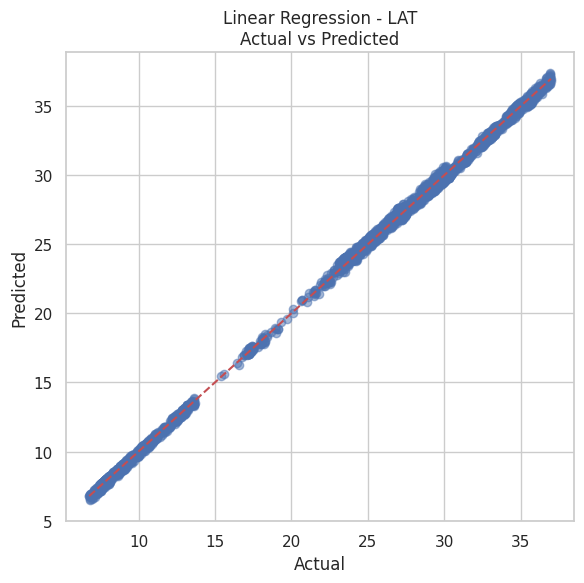

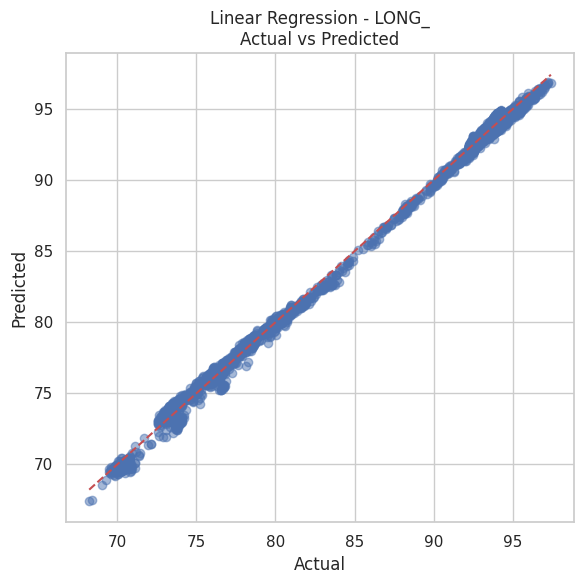

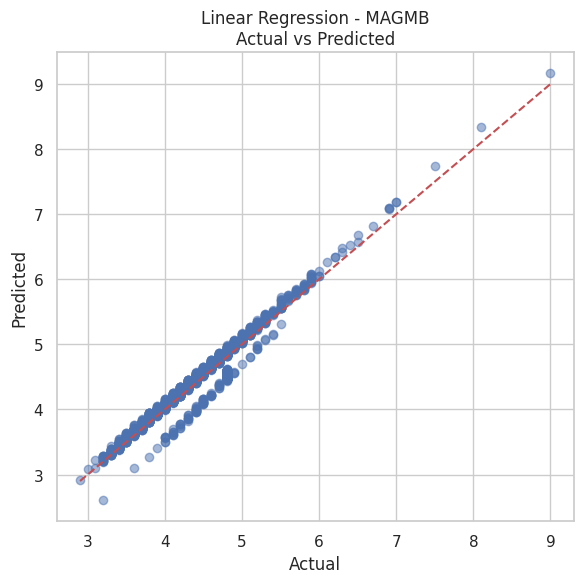

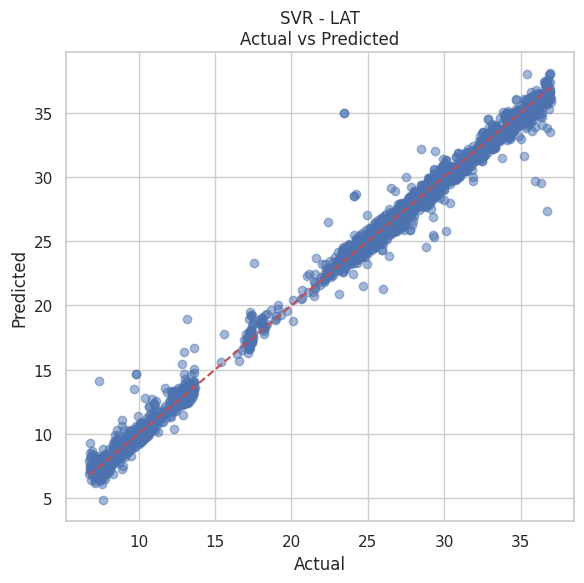

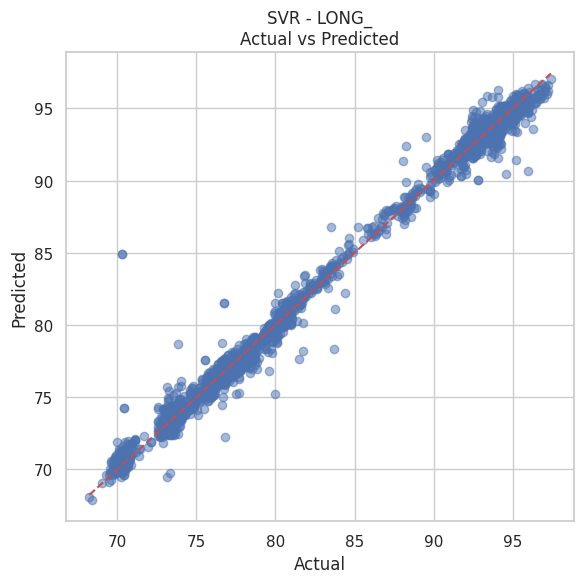

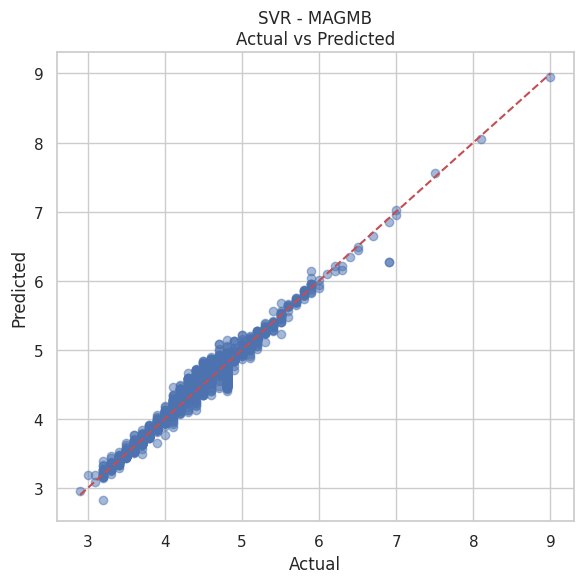

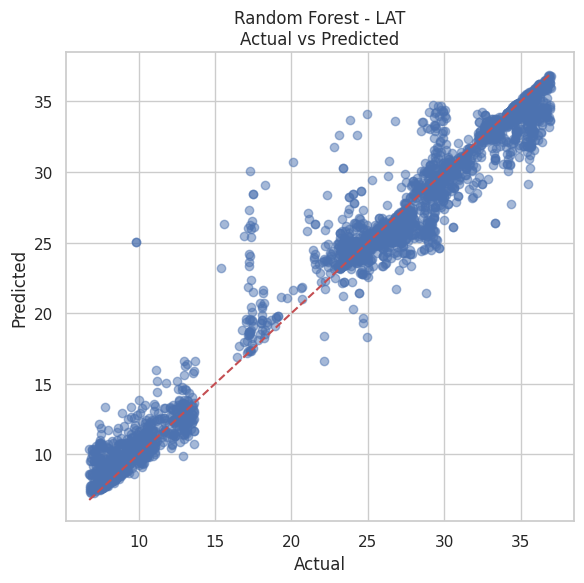

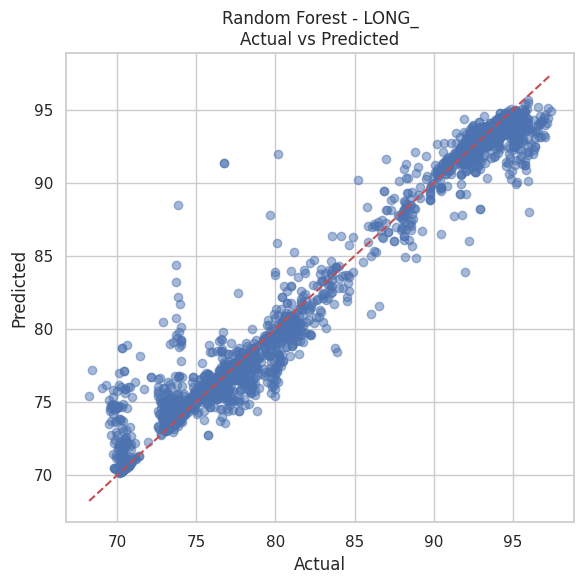

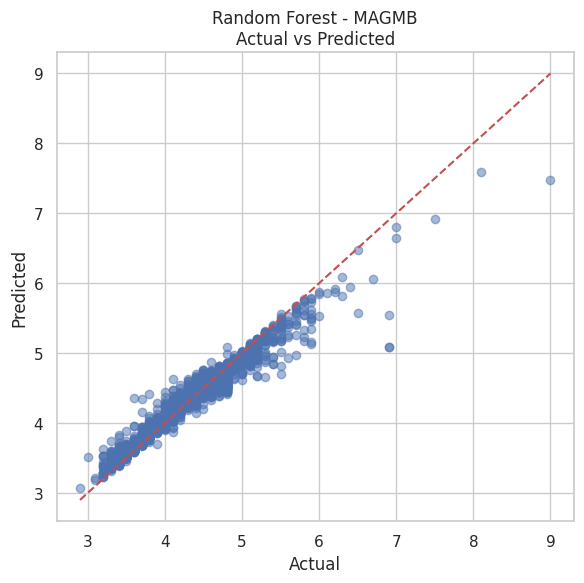

In [35]:
# === Step 6.6: Plot Actual vs Predicted ===
print("\n📉 Generating Actual vs Predicted plots...")

def plot_actual_vs_pred(model_name, y_true, y_pred, target):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.title(f'{model_name} - {target}\nActual vs Predicted')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'{model_name}_{target}_actual_vs_pred.png')
    plt.show()

# Plot for Linear Regression
for i, col in enumerate(target_cols):
    plot_actual_vs_pred('Linear Regression', y_test[col], lr_preds[:, i], col)

# Plot for SVR
for col in target_cols:
    svr_model = best_models[f'SVR_{col}']
    y_test_scaled = scaler_y_target[col].transform(y_test[[col]])
    _, _, _, svr_pred = evaluate_model(f'SVR_{col}', svr_model, X_test_scaled, y_test_scaled, scaler_y_target[col])
    plot_actual_vs_pred('SVR', y_test[col], svr_pred, col)

# Plot for Random Forest
for i, col in enumerate(target_cols):
    plot_actual_vs_pred('Random Forest', y_test[col], rf_preds[:, i], col)

In [36]:
# MLP for Earthquake Prediction (Latitude, Longitude, Magnitude)

import pandas as pd
import numpy as np
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from datetime import datetime
import pytz
import os

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# === Step 0: Setup Inputs ===
# Assumes: df_india, features_to_reduce, low_vif_features, target_cols, scaler_pca, pca, feature_cols already exist
# Assumes: df_processed, X_train_scaled, X_test_scaled, y_train already exist

# === Step 1: Per-Target Scaling ===
scaler_y_target = {}
y_train_scaled = np.zeros((y_train.shape[0], len(target_cols)))

for i, col in enumerate(target_cols):
    scaler = StandardScaler()
    y_train_scaled[:, i] = scaler.fit_transform(y_train[[col]]).flatten()
    scaler_y_target[col] = scaler
    joblib.dump(scaler, f'scaler_y_{col}.pkl')  # Save for later inverse_transform

# === Step 2: Prepare Data for MLP ===
input_shape = X_train_scaled.shape[1]
output_shape = len(target_cols)

# === Step 3: Define MLP Model ===
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(output_shape)  # Linear output for regression
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# === Step 4: Callbacks ===
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('best_mlp_model.keras', monitor='val_mae', save_best_only=True, verbose=1)

def lr_scheduler(epoch, lr):
    return float(lr if epoch < 10 else lr * tf.math.exp(-0.1))

lr_schedule = LearningRateScheduler(lr_scheduler, verbose=1)
callbacks_list = [early_stopping, model_checkpoint, lr_schedule]

# === Step 5: Train MLP ===
history = model.fit(X_train_scaled, y_train_scaled,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=64,
                    callbacks=callbacks_list,
                    verbose=1)

# === Step 6: Load Best Model ===
best_mlp_model = tf.keras.models.load_model('best_mlp_model.keras')

# === Step 7: Real-time Prediction ===
print("\n📌 Performing Real-time Prediction using MLP...")

ist = pytz.timezone('Asia/Kolkata')
current_time = datetime.now(ist)
current_time_numeric = current_time.timestamp()

# Median values for input features
input_dict = {
    'time_numeric': current_time_numeric,
    'HubDist': df_india['HubDist'].median(),
    'FaultDensity': df_india['FaultDensity'].median()
}

# === Step 8: Prepare Real-time Input ===
if features_to_reduce:
    dummy_high_vif_df = pd.DataFrame(0.0, index=[0], columns=[col for col in features_to_reduce if col != 'time_numeric'])
    if 'time_numeric' in features_to_reduce:
        dummy_high_vif_df['time_numeric'] = current_time_numeric

    scaled_high_vif = scaler_pca.transform(dummy_high_vif_df)
    pca_features = pca.transform(scaled_high_vif)
    pca_feature_names = [f'pc_{i+1}' for i in range(pca_features.shape[1])]
    pca_df = pd.DataFrame(pca_features, columns=pca_feature_names)

    low_vif_input_df = pd.DataFrame([input_dict])
    real_input_df = pd.concat([pca_df, low_vif_input_df[low_vif_features]], axis=1)
else:
    real_input_df = pd.DataFrame([input_dict])[feature_cols]

# Ensure same column order
real_input_df = real_input_df[feature_cols]

# === Step 9: Scale Input ===
real_input_scaled = scaler_X.transform(real_input_df)

# === Step 10: Predict ===
mlp_pred_scaled = best_mlp_model.predict(real_input_scaled, verbose=0)

# === Step 11: Inverse Transform ===
scaler_y_target = {col: joblib.load(f'scaler_y_{col}.pkl') for col in target_cols}

mlp_pred_original = []
for i, col in enumerate(target_cols):
    scaler = scaler_y_target[col]
    inv = scaler.inverse_transform(mlp_pred_scaled[:, i].reshape(-1, 1))
    mlp_pred_original.append(inv.flatten())

mlp_pred_original = np.stack(mlp_pred_original, axis=1)

# === Step 12: Optional Clipping for Realistic Ranges (India) ===
# lat: 5–38, long: 65–98, magnitude: 2.5–7.5
mlp_pred_original = np.clip(mlp_pred_original, a_min=[5, 65, 2.5], a_max=[38, 98, 7.5])

# === Step 13: Save & Display Prediction ===
real_time_predictions_mlp_df = pd.DataFrame(
    data=[mlp_pred_original[0]],
    columns=[f'MLP_{col}' for col in target_cols],
    index=[current_time]
)

print("\n✅ Real-time Predictions (MLP):")
print(real_time_predictions_mlp_df)

real_time_predictions_mlp_df.to_csv('real_time_earthquake_predictions_mlp.csv')
print("\n✅ Real-time MLP predictions saved to 'real_time_earthquake_predictions_mlp.csv'")


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5432 - mae: 0.5803
Epoch 1: val_mae improved from inf to 0.22679, saving model to best_mlp_model.keras
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.5419 - mae: 0.5795 - val_loss: 0.0938 - val_mae: 0.2268 - learning_rate: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
152/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1650 - mae: 0.3174
Epoch 2: val_mae improved from 0.22679 to 0.20618, saving model to best_mlp_model.keras
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1643 - mae: 0.3167 - val_loss: 0.0791 - val_mae: 0.2062 - learning_rate: 0.0010

Epoch 3: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 3/100
148/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1382 - mae: 0.2866
Epoch 3: val_mae improved from 0.20618 to 0.19524, saving model to best_mlp_mo

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

print("\n📊 Evaluating MLP Model...")

# === Predict on X_test_scaled ===
mlp_preds_scaled = best_mlp_model.predict(X_test_scaled, verbose=0)

# === Inverse-transform predictions per target ===
mlp_preds_original = np.zeros_like(mlp_preds_scaled)

for i, col in enumerate(target_cols):
    scaler = scaler_y_target[col]
    mlp_preds_original[:, i] = scaler.inverse_transform(mlp_preds_scaled[:, i].reshape(-1, 1)).ravel()

# === Evaluate per target ===
mlp_metrics = []
for i, col in enumerate(target_cols):
    y_true = y_test[col].values
    y_pred = mlp_preds_original[:, i]
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mlp_metrics.append([col, mse, mae, r2])
    print(f"\n📌 MLP - {col}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²:  {r2:.4f}")


📊 Evaluating MLP Model...

📌 MLP - LAT:
  MSE: 5.2853
  MAE: 1.7001
  R²:  0.9393

📌 MLP - LONG_:
  MSE: 3.4780
  MAE: 1.2639
  R²:  0.9599

📌 MLP - MAGMB:
  MSE: 0.0108
  MAE: 0.0790
  R²:  0.9665



📉 Plotting Actual vs Predicted for MLP...


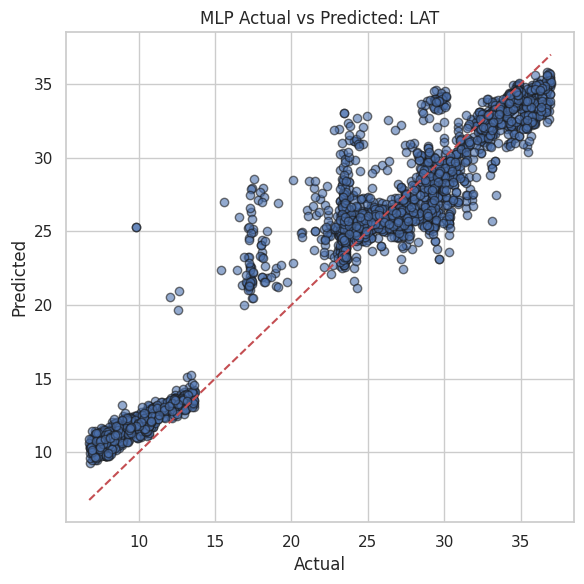

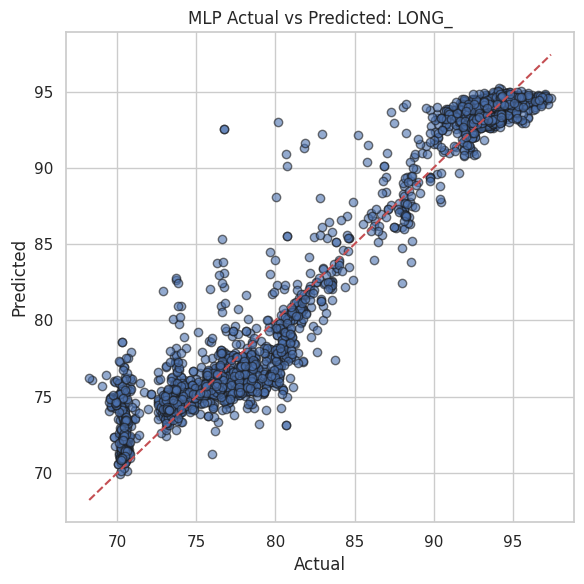

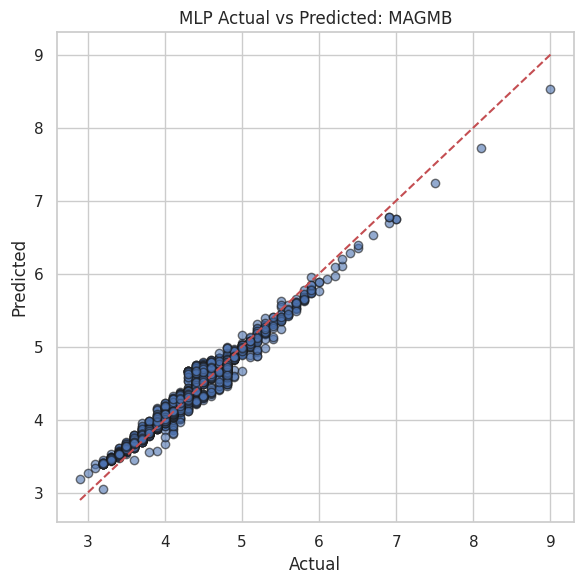

In [39]:
# === Step 6.10: Plot Actual vs Predicted ===
print("\n📉 Plotting Actual vs Predicted for MLP...")

def plot_mlp_actual_vs_pred(y_true, y_pred, label):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'MLP Actual vs Predicted: {label}')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'MLP_{label}_actual_vs_pred.png')
    plt.show()

for i, col in enumerate(target_cols):
    plot_mlp_actual_vs_pred(y_test[col].values, mlp_preds_original[:, i], col)

In [40]:
# --- Step: MLP Predictions on Test Set ---

# Predict using the trained MLP model
mlp_preds_scaled_test = best_mlp_model.predict(X_test_scaled)
mlp_preds_original_test = scaler_y.inverse_transform(mlp_preds_scaled_test)

# Build base DataFrame with time feature
test_data_predictions = pd.DataFrame({
    'time_numeric': X_test['time_numeric'].values  # assuming time_numeric is part of feature_cols
}, index=X_test.index)

# Add actual values for comparison
for col in target_cols:
    test_data_predictions[f'Actual_{col}'] = y_test[col].values

# Add MLP predictions to the DataFrame
for i, target_col in enumerate(target_cols):
    test_data_predictions[f'MLP_Predicted_{target_col}'] = mlp_preds_original_test[:, i]

# Display top rows
print("\n📘 Test Data (time_numeric) + Actual vs MLP Predictions:")
print(test_data_predictions.head())

# Save to CSV
test_data_predictions.to_csv('test_data_predictions_with_mlp.csv', index=False)
print("\n✅ File saved: 'test_data_predictions_with_mlp.csv'")

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

📘 Test Data (time_numeric) + Actual vs MLP Predictions:
       time_numeric  Actual_LAT  Actual_LONG_  Actual_MAGMB  \
3016     1106859641    9.710300     93.541300           5.0   
9913     1416187528   29.465300     70.116300           4.4   
11910      87700232   35.759998     72.980003           4.8   
6974      887251227   26.600000     87.910004           4.2   
15398      18027925   23.100000     69.300003           4.8   

       MLP_Predicted_LAT  MLP_Predicted_LONG_  MLP_Predicted_MAGMB  
3016           12.447441            92.840118             4.937910  
9913           34.559105            74.431480             4.554788  
11910          34.889397            74.078888             4.745366  
6974           25.942381            87.263039             4.169496  
15398          31.954491            76.391548             4.705057  

✅ File saved: 'test_data_predictions_with_mlp.csv'


In [41]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import pytz
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

# --- LSTM Model Training (Included here to ensure the model is available) ---

# Reshape for LSTM
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
output_shape = len(target_cols)

# Build LSTM Model
model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(1, X_train_scaled.shape[1])),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(output_shape)
])

model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Callbacks
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
checkpoint_lstm = ModelCheckpoint('best_lstm_model.keras', monitor='val_mae', save_best_only=True)

def lr_scheduler(epoch, lr):
    return lr if epoch < 10 else float(lr * tf.math.exp(-0.1))

lr_schedule = LearningRateScheduler(lr_scheduler)

# Train LSTM
print("🔁 Training LSTM model...")
history_lstm = model_lstm.fit(
    X_train_lstm, y_train_scaled, # Use y_train_scaled directly for multi-output LSTM
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping_lstm, checkpoint_lstm, lr_schedule],
    verbose=1
)

# Load best model
best_lstm_model = tf.keras.models.load_model('best_lstm_model.keras')

🔁 Training LSTM model...
Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.7579 - mae: 0.7246 - val_loss: 0.1097 - val_mae: 0.2588 - learning_rate: 0.0010
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1390 - mae: 0.2924 - val_loss: 0.0809 - val_mae: 0.2099 - learning_rate: 0.0010
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1117 - mae: 0.2581 - val_loss: 0.0679 - val_mae: 0.1876 - learning_rate: 0.0010
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0955 - mae: 0.2356 - val_loss: 0.0614 - val_mae: 0.1745 - learning_rate: 0.0010
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0869 - mae: 0.2212 - val_loss: 0.0562 - val_mae: 0.1674 - learning_rate: 0.0010
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0807 - mae: 0.2117 - val_loss: 0.0522 - val_mae: 0.1574 - learning_rate: 0.0010
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0751 - mae: 0.2032 - val_loss: 0.0500 - val_mae: 0.15

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

print("\n📊 Evaluating LSTM Model...")

# === Step: Predict on test data ===
lstm_preds_scaled = best_lstm_model.predict(X_test_lstm, verbose=0)

# === Inverse transform predictions ===
lstm_preds_original = np.zeros_like(lstm_preds_scaled)

for i, col in enumerate(target_cols):
    scaler = scaler_y_target[col]  # You already saved/loaded these
    lstm_preds_original[:, i] = scaler.inverse_transform(lstm_preds_scaled[:, i].reshape(-1, 1)).ravel()

# === Compute metrics ===
lstm_metrics = []
for i, col in enumerate(target_cols):
    y_true = y_test[col].values
    y_pred = lstm_preds_original[:, i]
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    lstm_metrics.append([col, mse, mae, r2])
    print(f"\n📌 LSTM - {col}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R²:  {r2:.4f}")


📊 Evaluating LSTM Model...

📌 LSTM - LAT:
  MSE: 4.6202
  MAE: 1.4333
  R²:  0.9469

📌 LSTM - LONG_:
  MSE: 3.8033
  MAE: 1.3167
  R²:  0.9561

📌 LSTM - MAGMB:
  MSE: 0.0091
  MAE: 0.0699
  R²:  0.9718



📉 Plotting Actual vs Predicted for LSTM...


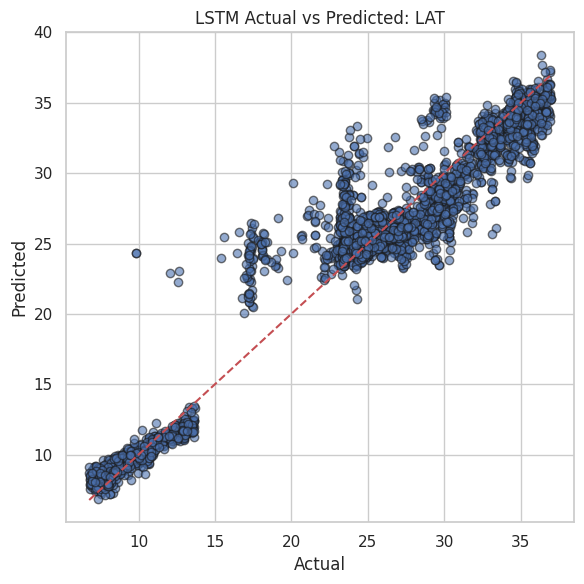

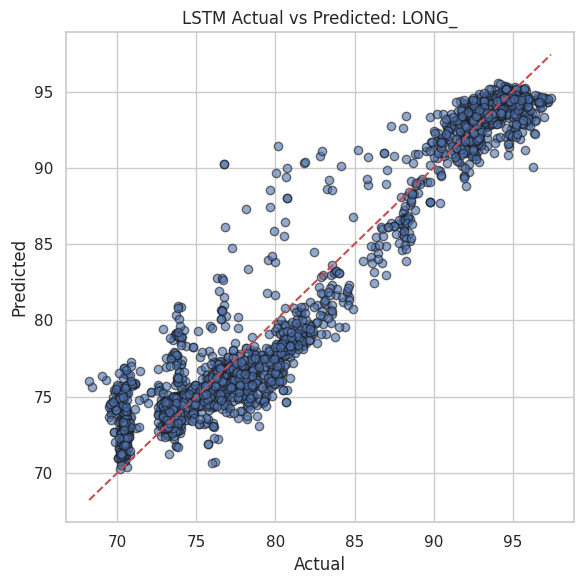

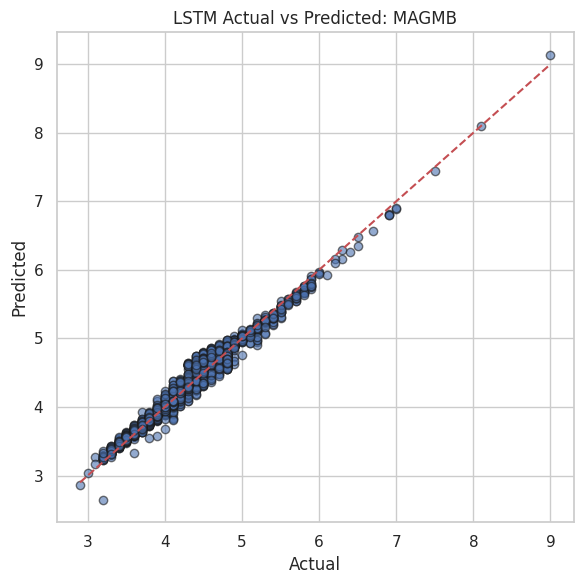

In [43]:
# === Plot Actual vs Predicted for LSTM ===
print("\n📉 Plotting Actual vs Predicted for LSTM...")

def plot_lstm_actual_vs_pred(y_true, y_pred, label):
    plt.figure(figsize=(6, 6))
    plt.scatter(y_true, y_pred, alpha=0.6, edgecolor='k')
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'LSTM Actual vs Predicted: {label}')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'LSTM_{label}_actual_vs_pred.png')
    plt.show()

for i, col in enumerate(target_cols):
    plot_lstm_actual_vs_pred(y_test[col].values, lstm_preds_original[:, i], col)


In [44]:
# --- Future Prediction ---

# Latest earthquake timestamp in India dataset
start_time = df_india['time'].max() if not df_india['time'].empty else datetime.now(pytz.timezone('Asia/Kolkata'))

# Parameters
future_years = 100
earthquakes_per_year = 233
total_future_events = future_years * earthquakes_per_year

# Generate future timestamps (random within 100 years)
np.random.seed(42)
days_offsets = np.random.randint(1, 365 * future_years, total_future_events)
seconds_offsets = np.random.randint(0, 86400, total_future_events)

future_timestamps = [start_time + timedelta(days=int(d), seconds=int(s)) for d, s in zip(days_offsets, seconds_offsets)]
future_timestamps = sorted(future_timestamps)  # sort chronologically

# Convert timestamps to Unix time
future_time_numeric = [ts.timestamp() for ts in future_timestamps]

# Prepare prediction input features
if features_to_reduce:
    future_input_df = pd.DataFrame(0.0, index=range(len(future_time_numeric)), columns=features_to_reduce)
    if 'time_numeric' in future_input_df.columns:
        future_input_df['time_numeric'] = future_time_numeric
    for col in features_to_reduce:
        if col != 'time_numeric':
            future_input_df[col] = df_india[col].median() if col in df_india.columns else 0.0
    future_input_df.fillna(future_input_df.median(), inplace=True)

    scaled_input = scaler_pca.transform(future_input_df)
    pca_output = pca.transform(scaled_input)
    # Corrected: Use the original feature_cols to get the PCA column names
    pca_feature_names = [col for col in feature_cols if col.startswith('pc_')]
    pca_df = pd.DataFrame(pca_output, columns=pca_feature_names)

    future_low_vif = pd.DataFrame({
        'time_numeric': future_time_numeric,
        'HubDist': df_india['HubDist'].median(),
        'FaultDensity': df_india['FaultDensity'].median()
    }, index=range(len(future_time_numeric))) # Ensure index aligns for concat


    future_X = pd.concat([pca_df.reset_index(drop=True), future_low_vif.reset_index(drop=True)], axis=1)
    future_X_scaled = scaler_X.transform(future_X[feature_cols])  # Ensure same column order

else:
    future_X = pd.DataFrame({
        'time_numeric': future_time_numeric,
        'HubDist': df_india['HubDist'].median(),
        'FaultDensity': df_india['FaultDensity'].median()
    })[feature_cols]
    future_X_scaled = scaler_X.transform(future_X)

# Build empty DataFrame with timestamps
future_predictions_df = pd.DataFrame(index=future_timestamps)
target_cols = [lat_col, lon_col, mag_col]

# --- Linear Regression ---
print("🔹 Predicting with Linear Regression...")
lr_preds = best_models['Linear Regression'].predict(future_X_scaled)
for i, col in enumerate(target_cols):
    future_predictions_df[f'LR_Predicted_{col}'] = lr_preds[:, i]

# --- SVR ---
print("🔹 Predicting with SVR...")
for i, col in enumerate(target_cols):
    svr = best_models[f'SVR_{col}']
    svr_pred_scaled = svr.predict(future_X_scaled).reshape(-1, 1)
    # Corrected: Use the individual target scaler for inverse transform
    scaler = scaler_y_target[col]
    svr_pred_original = scaler.inverse_transform(svr_pred_scaled)
    future_predictions_df[f'SVR_Predicted_{col}'] = svr_pred_original[:, 0] # Extract the single column

# --- Random Forest ---
print("🔹 Predicting with Random Forest...")
rf_preds = best_models['Random Forest'].predict(future_X_scaled)
for i, col in enumerate(target_cols):
    future_predictions_df[f'RF_Predicted_{col}'] = rf_preds[:, i]

# --- MLP Neural Network ---
print("🔹 Predicting with MLP Model...")
mlp_model = tf.keras.models.load_model('best_mlp_model.keras')
mlp_preds_scaled = mlp_model.predict(future_X_scaled, verbose=0)
# Corrected: Use the individual target scalers for inverse transform
mlp_preds_original = []
for i, col in enumerate(target_cols):
    scaler = scaler_y_target[col]
    inv = scaler.inverse_transform(mlp_preds_scaled[:, i].reshape(-1, 1))
    mlp_preds_original.append(inv.flatten())

mlp_preds = np.stack(mlp_preds_original, axis=1)

for i, col in enumerate(target_cols):
    future_predictions_df[f'MLP_Predicted_{col}'] = mlp_preds[:, i]

# --- LSTM ---
print("🔹 Predicting with LSTM Model...")
best_lstm_model = tf.keras.models.load_model('best_lstm_model.keras')
future_X_lstm = future_X_scaled.reshape((future_X_scaled.shape[0], 1, future_X_scaled.shape[1]))
lstm_preds_scaled = best_lstm_model.predict(future_X_lstm, verbose=0)
# Corrected: Use the individual target scalers for inverse transform
lstm_preds_original = []
for i, col in enumerate(target_cols):
    scaler = scaler_y_target[col]
    inv = scaler.inverse_transform(lstm_preds_scaled[:, i].reshape(-1, 1))
    lstm_preds_original.append(inv.flatten())
lstm_preds = np.stack(lstm_preds_original, axis=1)

for i, col in enumerate(target_cols):
     future_predictions_df[f'LSTM_Predicted_{col}'] = lstm_preds[:, i]


# Save results
csv_path = 'future_earthquake_predictions_100years.csv'
future_predictions_df.to_csv(csv_path)
print(f"\n✅ Future predictions saved to: {csv_path}")

# Show a sample of results
print("\n🔍 Sample Future Earthquake Predictions:")
print(future_predictions_df.sample(4))

🔹 Predicting with Linear Regression...
🔹 Predicting with SVR...
🔹 Predicting with Random Forest...
🔹 Predicting with MLP Model...
🔹 Predicting with LSTM Model...

✅ Future predictions saved to: future_earthquake_predictions_100years.csv

🔍 Sample Future Earthquake Predictions:
                     LR_Predicted_LAT  LR_Predicted_LONG_  LR_Predicted_MAGMB  \
2053-04-18 18:53:27        334.209990          390.287457            6.775835   
2082-02-28 21:32:33        512.442531          568.173842            8.166381   
2035-12-18 09:26:50        227.177027          283.462370            5.940779   
2081-08-31 19:10:10        509.381033          565.118290            8.142496   

                     SVR_Predicted_LAT  SVR_Predicted_LONG_  \
2053-04-18 18:53:27         104.719548           155.660490   
2082-02-28 21:32:33          36.697395            94.200984   
2035-12-18 09:26:50         148.074731           195.915746   
2081-08-31 19:10:10          37.255355            94.686600   

